In [1628]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as mno
import numpy as np
from sklearn import linear_model
%matplotlib inline
plt.style.use('bmh')

In [1629]:
df = pd.read_csv("D:\DBS\DBS\Dissertation\Data\England\Championship (2019,2020).csv")
df2 = pd.read_csv("D:\DBS\DBS\Dissertation\Data\England\Conference (2019,2020).csv")
df3 = pd.read_csv("D:\DBS\DBS\Dissertation\Data\England\League 1 (2019,2020).csv")
df4 = pd.read_csv("D:\DBS\DBS\Dissertation\Data\England\League 2(2019,2020).csv")
df5 = pd.read_csv("D:\DBS\DBS\Dissertation\Data\England\Premier league (2019,2020).csv")

In [1630]:
#combining all the England data
df_eng = pd.concat([df, df2,df3,df4,df5], ignore_index=True)

In [1631]:
df_eng.shape

(2023, 106)

In [1632]:
df_eng.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E1,02/08/2019,19:45,Luton,Middlesbrough,3,3,D,2,2,...,1.79,-0.25,1.94,1.96,1.96,1.96,1.98,1.98,1.94,1.93
1,E1,03/08/2019,15:00,Barnsley,Fulham,1,0,H,1,0,...,2.13,0.25,2.04,1.86,2.05,1.87,2.07,1.88,2.02,1.84
2,E1,03/08/2019,15:00,Blackburn,Charlton,1,2,A,0,1,...,1.84,-0.75,1.88,2.02,1.91,2.01,1.94,2.02,1.89,1.98
3,E1,03/08/2019,15:00,Brentford,Birmingham,0,1,A,0,1,...,1.93,-0.50,2.00,1.90,2.01,1.91,2.01,1.96,1.96,1.90
4,E1,03/08/2019,15:00,Millwall,Preston,1,0,H,1,0,...,1.66,-0.25,2.11,1.79,2.12,1.81,2.13,1.87,2.08,1.80


In [1633]:
#adding the country label to the dataframe
df_eng['Country'] = 'England'

In [1634]:
df_eng.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,Country
0,E1,02/08/2019,19:45,Luton,Middlesbrough,3,3,D,2,2,...,-0.25,1.94,1.96,1.96,1.96,1.98,1.98,1.94,1.93,England
1,E1,03/08/2019,15:00,Barnsley,Fulham,1,0,H,1,0,...,0.25,2.04,1.86,2.05,1.87,2.07,1.88,2.02,1.84,England
2,E1,03/08/2019,15:00,Blackburn,Charlton,1,2,A,0,1,...,-0.75,1.88,2.02,1.91,2.01,1.94,2.02,1.89,1.98,England
3,E1,03/08/2019,15:00,Brentford,Birmingham,0,1,A,0,1,...,-0.50,2.00,1.90,2.01,1.91,2.01,1.96,1.96,1.90,England
4,E1,03/08/2019,15:00,Millwall,Preston,1,0,H,1,0,...,-0.25,2.11,1.79,2.12,1.81,2.13,1.87,2.08,1.80,England


In [1635]:
df1_scot = pd.read_csv("D:\DBS\DBS\Dissertation\Data\Scotland\Divison 1 (2019,2020).csv")
df2_scot = pd.read_csv("D:\DBS\DBS\Dissertation\Data\Scotland\Divison 2 (2019,2020).csv")
df3_scot = pd.read_csv("D:\DBS\DBS\Dissertation\Data\Scotland\Divison 3 (2019,2020).csv")
df4_scot = pd.read_csv("D:\DBS\DBS\Dissertation\Data\Scotland\Premier League (2019,2020).csv")

In [1636]:
#combining all the Scotland data
df_scot = pd.concat([df1_scot, df2_scot,df3_scot,df4_scot], ignore_index=True)
df_scot['Country'] = 'Scotland'

In [1637]:
df_scot.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,Country
0,SC1,02/08/2019,19:05,Dunfermline,Dundee,2,2,D,2,1,...,0.00,2.10,1.77,2.11,1.79,2.12,1.84,2.05,1.78,Scotland
1,SC1,03/08/2019,15:00,Alloa,Partick,1,1,D,1,0,...,0.50,1.93,1.93,1.97,1.93,2.01,1.95,1.91,1.91,Scotland
2,SC1,03/08/2019,15:00,Arbroath,Queen of Sth,0,0,D,0,0,...,-0.25,2.05,1.80,2.04,1.85,2.08,1.85,2.02,1.81,Scotland
3,SC1,03/08/2019,15:00,Ayr,Morton,4,2,H,1,0,...,-0.50,2.10,1.77,2.08,1.82,2.13,1.82,2.08,1.76,Scotland
4,SC1,03/08/2019,15:00,Dundee United,Inverness C,4,1,H,2,1,...,-0.50,1.88,1.98,1.88,2.02,1.91,2.02,1.87,1.95,Scotland


In [1638]:
#combining all the Germany data
df1_germ = pd.read_csv("D:\DBS\DBS\Dissertation\Data\Germany\Bundesliga 1 (2019,2020).csv")
df2_germ = pd.read_csv("D:\DBS\DBS\Dissertation\Data\Germany\Bundesliga 2(2019,2020).csv")
df_germ = pd.concat([df1_germ,df2_germ], ignore_index=True )
df_germ['Country'] = 'Germany'

In [1639]:
df_germ.shape

(517, 106)

In [1640]:
df1_italy = pd.read_csv("D:\DBS\DBS\Dissertation\Data\Italy\Serie A (2019,2020).csv")
df2_italy = pd.read_csv("D:\DBS\DBS\Dissertation\Data\Italy\Serie B(2019,2020).csv")
#combining all the Italy data
df_italy = pd.concat([df1_italy,df2_italy], ignore_index=True)
df_italy['Country'] = 'Italy'
df_italy.shape
df_italy.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,Country
0,I1,24/08/2019,17:00,Parma,Juventus,0,1,A,0,1,...,1.50,1.77,2.02,1.81,2.11,1.93,2.12,1.83,2.04,Italy
1,I1,24/08/2019,19:45,Fiorentina,Napoli,3,4,A,1,2,...,0.75,1.75,2.05,1.81,2.11,1.94,2.14,1.80,2.09,Italy
2,I1,25/08/2019,17:00,Udinese,Milan,1,0,H,0,0,...,0.50,1.86,2.07,1.88,2.04,1.91,2.09,1.85,2.04,Italy
3,I1,25/08/2019,19:45,Cagliari,Brescia,0,1,A,0,0,...,-0.75,2.10,1.83,2.11,1.82,2.12,1.85,2.08,1.82,Italy
4,I1,25/08/2019,19:45,Roma,Genoa,3,3,D,2,2,...,-0.75,1.97,1.96,1.98,1.94,1.99,2.20,1.92,1.97,Italy


In [1641]:
df1_spain = pd.read_csv("D:\DBS\DBS\Dissertation\Data\Spain\La Liga Primera Division (2019,2020).csv")
df2_spain = pd.read_csv("D:\DBS\DBS\Dissertation\Data\Spain\La Liga Segunda Division (2019,2020).csv")

#combining all the Italy data
df_spain = pd.concat([df1_spain,df2_spain], ignore_index=True)
df_spain['Country'] = 'Spain'


In [1642]:
df1_france = pd.read_csv("D:\DBS\DBS\Dissertation\Data\France\Division 2 (2019,2020).csv")
df2_france = pd.read_csv("D:\DBS\DBS\Dissertation\Data\France\Le Championnat (2019,2020).csv")

#combining all the France data
df_france = pd.concat([df1_france,df2_france], ignore_index=True)
df_france['Country'] = 'France'

In [1643]:
df1_Neth = pd.read_csv("D:\DBS\DBS\Dissertation\Data\\Netherlands\\Eredivisie (2019,2020).csv")
df1_Neth['Country'] = 'Netherlands'

In [1644]:
df1_Bel = pd.read_csv("D:\DBS\DBS\Dissertation\Data\Belgium\Jupiler League (2019,2020).csv")
df1_Bel['Country'] = 'Belgium'

In [1645]:
df1_Por = pd.read_csv("D:\DBS\DBS\Dissertation\Data\Portugal\Liga I (2019,2020).csv")
df1_Por['Country'] = 'Portugal'

In [1646]:
df1_Turk = pd.read_csv("D:\DBS\DBS\Dissertation\Data\Turkey\Futbol Ligi 1 (2019,2020).csv")
df1_Turk['Country'] = 'Turkey'

In [1647]:
df1_Gre = pd.read_csv("D:\DBS\DBS\Dissertation\Data\Greece\Ethniki Katigoria (2019,2020).csv")
df1_Gre['Country'] = 'Greece'
df1_Gre.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,Country
0,G1,24/08/2019,17:00,Lamia,Panathinaikos,1,1,D,1,1,...,0.50,1.80,2.05,1.83,2.06,1.89,2.12,1.81,2.02,Greece
1,G1,24/08/2019,19:00,Aris,OFI Crete,1,1,D,0,1,...,-1.25,1.98,1.88,2.01,1.87,2.10,1.91,2.01,1.82,Greece
2,G1,24/08/2019,19:30,Olympiakos,Asteras Tripolis,1,0,H,1,0,...,-1.75,2.05,1.80,2.10,1.79,2.13,1.97,1.99,1.84,Greece
3,G1,25/08/2019,17:00,Atromitos,Larisa,1,1,D,1,1,...,-0.75,1.95,1.90,1.98,1.91,1.99,1.94,1.94,1.90,Greece
4,G1,25/08/2019,17:15,Panionios,Volos NFC,1,2,A,0,1,...,-0.25,1.70,2.20,1.68,2.27,2.09,2.27,1.74,2.11,Greece


In [1648]:
#combining all the country data and create a new dataframe
df_2019_20 = pd.concat([df_eng,df_scot,df_germ,df_italy,df_spain,df_france,df1_Neth,df1_Bel,df1_Por,df1_Turk,df1_Gre], ignore_index=True)

In [1649]:
#outlier removal


df_2019_20['B365H'] = np.where((df_2019_20.B365H >= 9.5),df_2019_20['B365H'].mean(),df_2019_20.B365H)
df_2019_20['B365D'] = np.where((df_2019_20.B365D >= 8.5),df_2019_20['B365D'].mean(),df_2019_20.B365D)
df_2019_20['B365A'] = np.where((df_2019_20.B365A >= 17),df_2019_20['B365A'].mean(),df_2019_20.B365A)
df_2019_20['BWH'] = np.where((df_2019_20.BWH >= 9.5),df_2019_20['BWH'].mean(),df_2019_20.BWH)
df_2019_20['BWD'] = np.where((df_2019_20.BWH >= 8.5),df_2019_20['BWD'].mean(),df_2019_20.BWD)
df_2019_20['BWA'] = np.where((df_2019_20.BWH >= 17.5),df_2019_20['BWA'].mean(),df_2019_20.BWA)
df_2019_20['IWH'] = np.where((df_2019_20.IWH >= 8.787),df_2019_20['IWH'].mean(),df_2019_20.IWH)
df_2019_20['IWD'] = np.where((df_2019_20.IWD >= 8),df_2019_20['IWD'].mean(),df_2019_20.IWD)
df_2019_20['IWA'] = np.where((df_2019_20.IWA >= 16.5),df_2019_20['IWA'].mean(),df_2019_20.IWA)
df_2019_20['PSH'] = np.where((df_2019_20.PSH >= 9.7145),df_2019_20['PSH'].mean(),df_2019_20.PSH)
df_2019_20['PSD'] = np.where((df_2019_20.PSD >= 8.7145),df_2019_20['PSD'].mean(),df_2019_20.PSD)
df_2019_20['PSA'] = np.where((df_2019_20.PSA >= 19.8005),df_2019_20['PSA'].mean(),df_2019_20.PSA)
df_2019_20['WHH'] = np.where((df_2019_20.WHH >= 9.5),df_2019_20['WHH'].mean(),df_2019_20.WHH)
df_2019_20['WHD'] = np.where((df_2019_20.WHD >= 8),df_2019_20['WHD'].mean(),df_2019_20.WHD)
df_2019_20['WHA'] = np.where((df_2019_20.WHA >= 19),df_2019_20['WHA'].mean(),df_2019_20.WHA)
df_2019_20['VCH'] = np.where((df_2019_20.VCH >= 9.5),df_2019_20['VCH'].mean(),df_2019_20.VCH)
df_2019_20['VCD'] = np.where((df_2019_20.VCD >= 8.5),df_2019_20['VCD'].mean(),df_2019_20.VCD)
df_2019_20['VCA'] = np.where((df_2019_20.VCA >= 19),df_2019_20['VCA'].mean(),df_2019_20.VCA)
df_2019_20['MaxH'] = np.where((df_2019_20.MaxH >= 10.5),df_2019_20['MaxH'].mean(),df_2019_20.MaxH)
df_2019_20['MaxD'] = np.where((df_2019_20.MaxD>= 9.5),df_2019_20['MaxD'].mean(),df_2019_20.MaxD)
df_2019_20['MaxA'] = np.where((df_2019_20.MaxA >= 23),df_2019_20['MaxA'].mean(),df_2019_20.MaxA)
df_2019_20['AvgH'] = np.where((df_2019_20.AvgH >= 9.037),df_2019_20['AvgH'].mean(),df_2019_20.AvgH)
df_2019_20['AvgD'] = np.where((df_2019_20.AvgD >= 8.3722),df_2019_20['AvgD'].mean(),df_2019_20.AvgD)
df_2019_20['AvgA'] = np.where((df_2019_20.AvgA >= 18.0274),df_2019_20['AvgA'].mean(),df_2019_20.AvgA)
df_2019_20['B365>2.5'] = np.where((df_2019_20['B365>2.5']>= 2.87),df_2019_20['B365>2.5'].mean(),df_2019_20['B365>2.5'])
df_2019_20['B365<2.5'] = np.where((df_2019_20['B365<2.5'] >= 3.5),df_2019_20['B365<2.5'].mean(),df_2019_20['B365<2.5'])
df_2019_20['P>2.5'] = np.where((df_2019_20['P>2.5'] >= 2.89),df_2019_20['P>2.5'].mean(),df_2019_20['P>2.5'])
df_2019_20['P<2.5'] = np.where((df_2019_20['P<2.5'] >= 3.59),df_2019_20['P<2.5'].mean(),df_2019_20['P<2.5'])
df_2019_20['Max>2.5'] = np.where((df_2019_20['Max>2.5'] >= 2.9),df_2019_20['Max>2.5'].mean(),df_2019_20['Max>2.5'])
df_2019_20['Max<2.5'] = np.where((df_2019_20['Max<2.5'] >= 3.7),df_2019_20['Max<2.5'].mean(),df_2019_20['Max<2.5'])
df_2019_20['Avg>2.5'] = np.where((df_2019_20['Avg>2.5'] >= 2.7),df_2019_20['Avg>2.5'].mean(),df_2019_20['Avg>2.5'])
df_2019_20['Avg<2.5'] = np.where((df_2019_20['Avg<2.5'] >= 3.4),df_2019_20['Avg<2.5'].mean(),df_2019_20['Avg<2.5'])
df_2019_20['AHh'] = np.where((df_2019_20.AHh >= 1.5),df_2019_20['AHh'].mean(),df_2019_20.AHh)
df_2019_20['B365AHH'] = np.where((df_2019_20.B365AHH >= 2.1),df_2019_20['B365AHH'].mean(),df_2019_20.B365AHH)
df_2019_20['B365AHA'] = np.where((df_2019_20.B365AHA >= 2.13),df_2019_20['B365AHA'].mean(),df_2019_20.B365AHA)
df_2019_20['PAHH'] = np.where((df_2019_20.PAHH >= 2.16),df_2019_20['PAHH'].mean(),df_2019_20.PAHH)
df_2019_20['PAHA'] = np.where((df_2019_20.HS >= 2.15),df_2019_20['HS'].mean(),df_2019_20.HS)
df_2019_20['MaxAHH'] = np.where((df_2019_20.HS >= 2.22),df_2019_20['HS'].mean(),df_2019_20.HS)
df_2019_20['MaxAHA'] = np.where((df_2019_20.HS >= 2.22),df_2019_20['HS'].mean(),df_2019_20.HS)
df_2019_20['AvgAHH'] = np.where((df_2019_20.HS >= 2.12),df_2019_20['HS'].mean(),df_2019_20.HS)
df_2019_20['AvgAHA'] = np.where((df_2019_20.AvgAHA >= 2.11),df_2019_20['AvgAHA'].mean(),df_2019_20.AvgAHA)
df_2019_20['B365CH'] = np.where((df_2019_20.B365CH >= 10),df_2019_20['B365CH'].mean(),df_2019_20.B365CH)
df_2019_20['B365CD'] = np.where((df_2019_20.B365CD >= 9),df_2019_20['B365CD'].mean(),df_2019_20.B365CD)
df_2019_20['B365CA'] = np.where((df_2019_20.HS >= 19),df_2019_20['HS'].mean(),df_2019_20.HS)
df_2019_20['BWCH'] = np.where((df_2019_20.HS >= 9.5),df_2019_20['HS'].mean(),df_2019_20.HS)
df_2019_20['BWCD'] = np.where((df_2019_20.HS >= 8.75),df_2019_20['HS'].mean(),df_2019_20.HS)
df_2019_20['BWCA'] = np.where((df_2019_20.HS >= 18),df_2019_20['HS'].mean(),df_2019_20.HS)
df_2019_20['IWCH'] = np.where((df_2019_20.IWCH >= 8.9),df_2019_20['IWCH'].mean(),df_2019_20.IWCH)
df_2019_20['IWCD'] = np.where((df_2019_20.IWCD >= 7.9),df_2019_20['IWCD'].mean(),df_2019_20.IWCD)
df_2019_20['IWCA'] = np.where((df_2019_20.IWCA >= 16),df_2019_20['IWCA'].mean(),df_2019_20.IWCA)
df_2019_20['PSCH'] = np.where((df_2019_20.PSCH >= 9.9),df_2019_20['PSCH'].mean(),df_2019_20.PSCH)
df_2019_20['PSCD'] = np.where((df_2019_20.PSCD >= 9.9),df_2019_20['PSCD'].mean(),df_2019_20.PSCD)
df_2019_20['PSCA'] = np.where((df_2019_20.PSCA >= 9.9),df_2019_20['PSCA'].mean(),df_2019_20.PSCA)
df_2019_20['WHCH'] = np.where((df_2019_20.WHCH >= 10),df_2019_20['WHCH'].mean(),df_2019_20.WHCH)
df_2019_20['WHCD'] = np.where((df_2019_20.WHCD >= 9),df_2019_20['WHCD'].mean(),df_2019_20.WHCD)
df_2019_20['WHCA'] = np.where((df_2019_20.WHCA >= 21),df_2019_20['WHCA'].mean(),df_2019_20.WHCA)
df_2019_20['VCCH'] = np.where((df_2019_20.VCCH >= 10.3),df_2019_20['VCCH'].mean(),df_2019_20.VCCH)
df_2019_20['VCCD'] = np.where((df_2019_20.VCCD >= 9),df_2019_20['VCCD'].mean(),df_2019_20.VCCD)
df_2019_20['VCCA'] = np.where((df_2019_20.VCCA >= 20),df_2019_20['VCCA'].mean(),df_2019_20.VCCA)
df_2019_20['MaxCH'] = np.where((df_2019_20.MaxCH >= 11),df_2019_20['MaxCH'].mean(),df_2019_20.MaxCH)
df_2019_20['MaxCD'] = np.where((df_2019_20.MaxCD >= 10),df_2019_20['MaxCD'].mean(),df_2019_20.MaxCD)
df_2019_20['MaxCA'] = np.where((df_2019_20.MaxCA >= 24.9),df_2019_20['MaxCA'].mean(),df_2019_20.MaxCA)
df_2019_20['AvgCH'] = np.where((df_2019_20.HS >= 9.4),df_2019_20['HS'].mean(),df_2019_20.HS)
df_2019_20['AvgCD'] = np.where((df_2019_20.HS >= 8.8),df_2019_20['HS'].mean(),df_2019_20.HS)
df_2019_20['AvgCA'] = np.where((df_2019_20.HS >= 18.8),df_2019_20['HS'].mean(),df_2019_20.HS)
df_2019_20['B365C>2.5'] = np.where((df_2019_20.HS >= 3),df_2019_20['HS'].mean(),df_2019_20.HS)
df_2019_20['B365C<2.5'] = np.where((df_2019_20.HS >= 3.75),df_2019_20['HS'].mean(),df_2019_20.HS)
df_2019_20['PC>2.5'] = np.where((df_2019_20.HS >= 3),df_2019_20['HS'].mean(),df_2019_20.HS)
df_2019_20['PC<2.5'] = np.where((df_2019_20.HS >= 3.8),df_2019_20['HS'].mean(),df_2019_20.HS)
df_2019_20['MaxC>2.5'] = np.where((df_2019_20['MaxC>2.5'] >= 3.1),df_2019_20['MaxC>2.5'].mean(),df_2019_20['MaxC>2.5'])
df_2019_20['MaxC<2.5'] = np.where((df_2019_20['MaxC<2.5'] >= 3.8),df_2019_20['MaxC<2.5'].mean(),df_2019_20['MaxC<2.5'])
df_2019_20['AvgC>2.5'] = np.where((df_2019_20['AvgC>2.5'] >= 2.9),df_2019_20['AvgC>2.5'].mean(),df_2019_20['AvgC>2.5'])
df_2019_20['AvgC<2.5'] = np.where((df_2019_20['AvgC<2.5'] >= 3.5),df_2019_20['AvgC<2.5'].mean(),df_2019_20['AvgC<2.5'])
df_2019_20['AHCh'] = np.where((df_2019_20['AHCh'] >= 1.5),df_2019_20['AHCh'].mean(),df_2019_20['AHCh'])
df_2019_20['B365CAHH'] = np.where((df_2019_20.B365CAHH >= 2.1),df_2019_20['B365CAHH'].mean(),df_2019_20.B365CAHH)
df_2019_20['B365CAHA'] = np.where((df_2019_20.B365CAHA >= 2.1),df_2019_20['B365CAHA'].mean(),df_2019_20.B365CAHA)
df_2019_20['PCAHH'] = np.where((df_2019_20.PCAHH >= 2.17),df_2019_20['PCAHH'].mean(),df_2019_20.PCAHH)
df_2019_20['PCAHA'] = np.where((df_2019_20.PCAHA >= 2.18),df_2019_20['PCAHA'].mean(),df_2019_20.PCAHA)
df_2019_20['MaxCAHH'] = np.where((df_2019_20.MaxCAHH >= 2.22),df_2019_20['MaxCAHH'].mean(),df_2019_20.MaxCAHH)
df_2019_20['MaxCAHA'] = np.where((df_2019_20.MaxCAHA >= 2.25),df_2019_20['MaxCAHA'].mean(),df_2019_20.MaxCAHA)
df_2019_20['AvgCAHH'] = np.where((df_2019_20.AvgCAHH >= 2.12),df_2019_20['AvgCAHH'].mean(),df_2019_20.AvgCAHH)
df_2019_20['AvgCAHA'] = np.where((df_2019_20.AvgCAHA >= 2.13),df_2019_20['AvgCAHA'].mean(),df_2019_20.AvgCAHA)

In [1650]:
df_2019_20.to_excel("df_2019_20.xlsx")

In [1651]:
null_2019_20 = df_2019_20.isna().sum()

In [1652]:
null_2019_20.head()

Div         0
Date        0
Time        0
HomeTeam    0
AwayTeam    0
dtype: int64

In [1653]:
null_2019_20.to_excel("null_2019_20.xlsx")
null_2019_20.to_csv('null_2019_20.csv')

In [1654]:
df_2019_20.shape


(5932, 107)

In [1656]:
df_2019_20.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,Country
0,E1,02/08/2019,19:45,Luton,Middlesbrough,3,3,D,2,2,...,-0.25,1.940000,1.96,1.96,1.96,1.98,1.98,1.94,1.93,England
1,E1,03/08/2019,15:00,Barnsley,Fulham,1,0,H,1,0,...,0.25,2.040000,1.86,2.05,1.87,2.07,1.88,2.02,1.84,England
2,E1,03/08/2019,15:00,Blackburn,Charlton,1,2,A,0,1,...,-0.75,1.880000,2.02,1.91,2.01,1.94,2.02,1.89,1.98,England
3,E1,03/08/2019,15:00,Brentford,Birmingham,0,1,A,0,1,...,-0.50,2.000000,1.90,2.01,1.91,2.01,1.96,1.96,1.90,England
4,E1,03/08/2019,15:00,Millwall,Preston,1,0,H,1,0,...,-0.25,1.933138,1.79,2.12,1.81,2.13,1.87,2.08,1.80,England


In [1657]:
df_2019_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5932 entries, 0 to 5931
Columns: 107 entries, Div to Country
dtypes: float64(90), int64(8), object(9)
memory usage: 4.8+ MB


In [1658]:
#saving the names of the columns with missing values

missing_cols3 = ["AC","AF",
"AHh",
"AS",
"AST",
"Avg<2.5",
"Avg>2.5",
"AvgA",
"AvgAHA",
"AvgAHH",
"AvgCH",
"AvgCD",
"AvgCA",
"AvgD",
"AvgH",
"B365<2.5",
"B365>2.5",
"B365A",
"B365CA",                
"B365C<2.5", 
"B365C>2.5",
"B365AHA",
"B365AHH",
"B365CAHA",
"B365CAHH",
"B365D",
"B365H",
"BWA",
"BWCA",
"BWCD",
"BWCH",
"BWD",
"BWH",
"HC",
"HF",
"HS",
"HST",
"IWA",
"IWCA",
"IWCD",
"IWCH",
"IWD",
"IWH",
"Max<2.5",
"Max>2.5",
"MaxA",
"MaxAHA",
"MaxAHH",
"MaxD",
"MaxH",
"P<2.5",
"P>2.5",
"PAHA",
"PAHH",
"PC<2.5",
"PC>2.5",
"PCAHA",
"PCAHH",
"PSA",
"PSCA",
"PSCD",
"PSCH",
"PSD",
"PSH",
"VCA",
"VCCA",
"VCCD",
"VCCH",
"VCD",
"VCH",
"WHA",
"WHCA",
"WHCD",
"WHCH",
"WHD",
"WHH"
]

In [1659]:
#Using random_imputation method for imputing missing values

def random_imputation(df_2019_20, feature):

    number_missing = df_2019_20[feature].isnull().sum()
    observed_values = df_2019_20.loc[df_2019_20[feature].notnull(), feature]
    df_2019_20.loc[df_2019_20[feature].isnull(),feature] = np.random.choice(observed_values, number_missing, replace = True)
    
    return df_2019_20

In [1660]:
for feature in missing_cols3:
    #df_2019_20[feature + '_imp'] = df_2019_20[feature]
    df_2019_20 = random_imputation(df_2019_20, feature)

In [1661]:
df_2019_20.shape

(5932, 107)

In [1662]:
df_2019_20 = df_2019_20.drop(['Referee', 'Time'], axis = 1) 

In [1663]:
df_2019_20.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
count,5932.000000,5932.000000,5932.000000,5932.000000,5932.000000,5932.000000,5932.000000,5932.000000,5932.000000,5932.000000,...,5932.000000,5932.000000,5932.000000,5932.00000,5932.000000,5932.000000,5932.000000,5932.000000,5932.000000,5932.000000
mean,1.488874,1.170263,0.654754,0.520398,12.863958,10.584963,4.659137,3.844909,12.836312,13.367667,...,1.945075,-0.325847,1.921957,1.92288,1.949598,1.949082,1.997160,1.997176,1.919200,1.919941
std,1.246831,1.114128,0.819067,0.731373,5.000712,4.500888,2.523027,2.248187,4.168392,4.241789,...,0.364731,0.627866,0.091875,0.09200,0.099778,0.099655,0.099321,0.102071,0.092542,0.092754
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.290000,-4.000000,1.550000,1.27000,1.610000,1.300000,1.680000,1.300000,1.610000,1.280000
25%,1.000000,0.000000,0.000000,0.000000,9.000000,7.000000,3.000000,2.000000,10.000000,10.000000,...,1.690000,-0.500000,1.850000,1.85000,1.870000,1.870000,1.920000,1.920000,1.850000,1.840000
50%,1.000000,1.000000,0.000000,0.000000,12.000000,10.000000,4.000000,4.000000,13.000000,13.000000,...,1.880000,-0.250000,1.930000,1.93000,1.950000,1.950000,2.000000,2.000000,1.920000,1.920000
75%,2.000000,2.000000,1.000000,1.000000,16.000000,13.000000,6.000000,5.000000,15.000000,16.000000,...,2.120000,0.000000,2.000000,2.00000,2.030000,2.030000,2.080000,2.070000,1.990000,1.990000
max,8.000000,9.000000,5.000000,5.000000,38.000000,33.000000,19.000000,22.000000,30.000000,36.000000,...,3.490000,1.250000,2.090000,2.09000,2.160000,2.170000,2.210000,2.240000,2.110000,2.120000


In [1664]:
df_2019_20['Total_Goals'] = df_2019_20['FTAG'] + df_2019_20['FTHG']

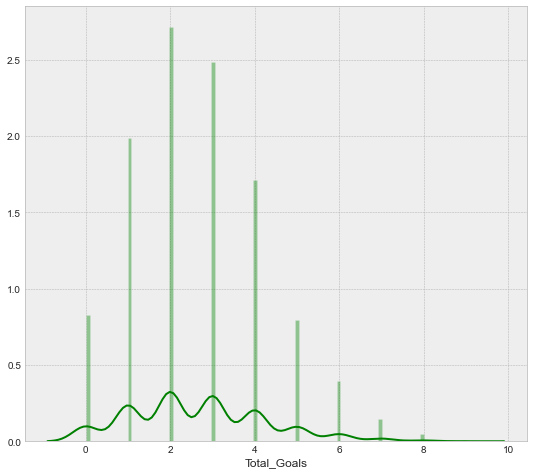

In [1665]:
plt.figure(figsize=(9, 8))
sns.distplot(df_2019_20['Total_Goals'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [1666]:
#total goals is normally distributed
#2 is the highest no of total goals 

In [1667]:
df_2019_20['FTR'].value_counts()

H    2593
A    1739
D    1600
Name: FTR, dtype: int64

In [1668]:
#the data is not balanced as the FTR data leans towards the Home wins

In [1669]:
Full_time_res = pd.get_dummies(df_2019_20['FTR'])

In [1670]:
Full_time_res.rename(columns={'H':'FTR_H','D':'FTR_D','A':'FTR_A'},inplace=True)

In [1671]:
Full_time_res.head()

,FTR_A,FTR_D,FTR_H
0,0,1,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1


In [1672]:
half_time_res = pd.get_dummies(df_2019_20['HTR'])

In [1673]:
half_time_res.rename(columns={'H':'HTR_H','D':'HTR_D','A':'HTR_A'},inplace=True)

In [1675]:
df_2019_20 = pd.concat([df_2019_20,Full_time_res,half_time_res],axis=1)

In [1676]:
#creating the Target variable

condition = [(df_2019_20['Total_Goals'] > 2.5),(df_2019_20['Total_Goals'] < 2.5)]
values = ['1','0']
df_2019_20['Above 2.5'] = np.select(condition,values)

In [1677]:
df_2019_20['Above 2.5'].value_counts()

1    2985
0    2947
Name: Above 2.5, dtype: int64

In [1678]:
df_2019_20.shape

(5932, 113)

In [1679]:
#calculating second half goals

df_2019_20['SH_AG'] = df_2019_20['FTAG'] - df_2019_20['HTAG']
df_2019_20['SH_HG'] = df_2019_20['FTHG'] - df_2019_20['HTHG']

In [1680]:
df_2019_20['SH_AG'] = abs(df_2019_20['SH_AG'])
df_2019_20['SH_HG'] = abs(df_2019_20['SH_HG'])

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


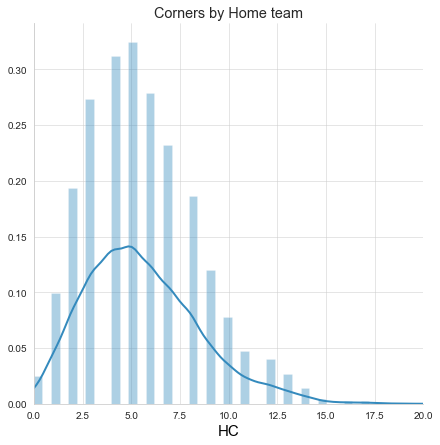

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


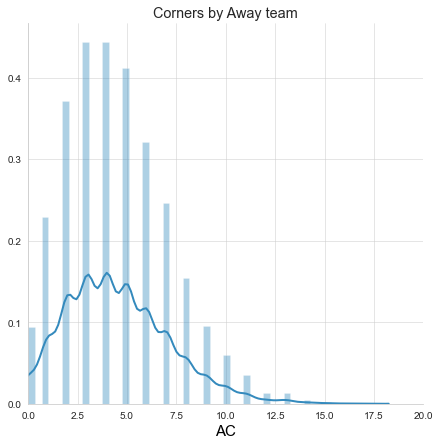

In [1681]:
#univariate analysis of Home corners and Away corners

sns.set_style("whitegrid")
a=sns.FacetGrid(df_2019_20,size=6) \
   .map(sns.distplot,"HC") \
   .add_legend()
plt.xlim(0,20)
plt.xlabel("HC",size=15,color="Black")
plt.title("Corners by Home team")
plt.show()
sns.set_style("whitegrid")
sns.FacetGrid(df_2019_20,size=6,) \
   .map(sns.distplot,"AC") \
   .add_legend()
plt.xlabel("AC",size=15,color="Black")
plt.title("Corners by Away team")
plt.xlim(0,20)
plt.show()


In [1682]:
#Home team corners = 5 is maximum and the next maximum are 4 and 6.
#Away team corners = 3 is maximum and the next maximum are 4 and 5.

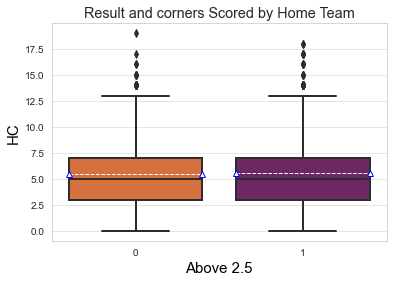

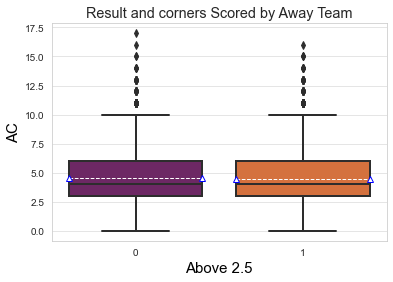

In [1683]:
#bivariate analysis of Home corners and Away corners versus Target variable

sns.boxplot(data=df_2019_20,x="Above 2.5",y="HC",palette="inferno_r", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and corners Scored by Home Team")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("HC",size=15,color="Black")
plt.show()

sns.boxplot(data=df_2019_20,x="Above 2.5",y="AC",palette="inferno", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and corners Scored by Away Team")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("AC",size=15,color="Black")
plt.show()


In [1684]:
#with respect to goals scored above/below 2.5, average corners by home teams are higher than the away teams where
#average corners by home teams are around 5 in matches with total goals above and below 2.5

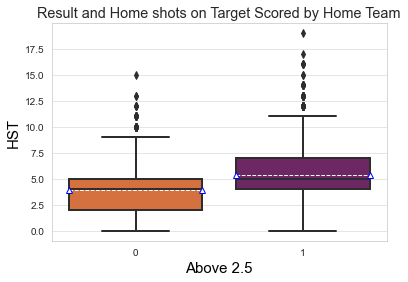

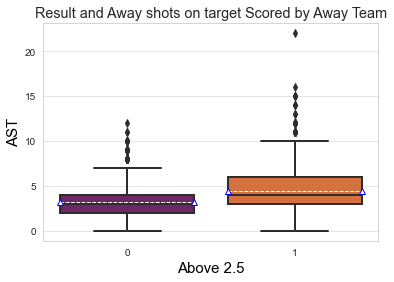

In [1685]:
#bivariate analysis of Home and Away shots on Target versus Target variable

sns.boxplot(data=df_2019_20,x="Above 2.5",y="HST",palette="inferno_r", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and Home shots on Target Scored by Home Team")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("HST",size=15,color="Black")
plt.show()

sns.boxplot(data=df_2019_20,x="Above 2.5",y="AST",palette="inferno", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and Away shots on target Scored by Away Team")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("AST",size=15,color="Black")
plt.show()

In [1686]:
#the average home shots on target is 5 when total goals are above 2.5 and 4 when goals are below 2.5
#the average away shots on target is 4 when total goals are above 2.5 and 3 when goals are below 2.5

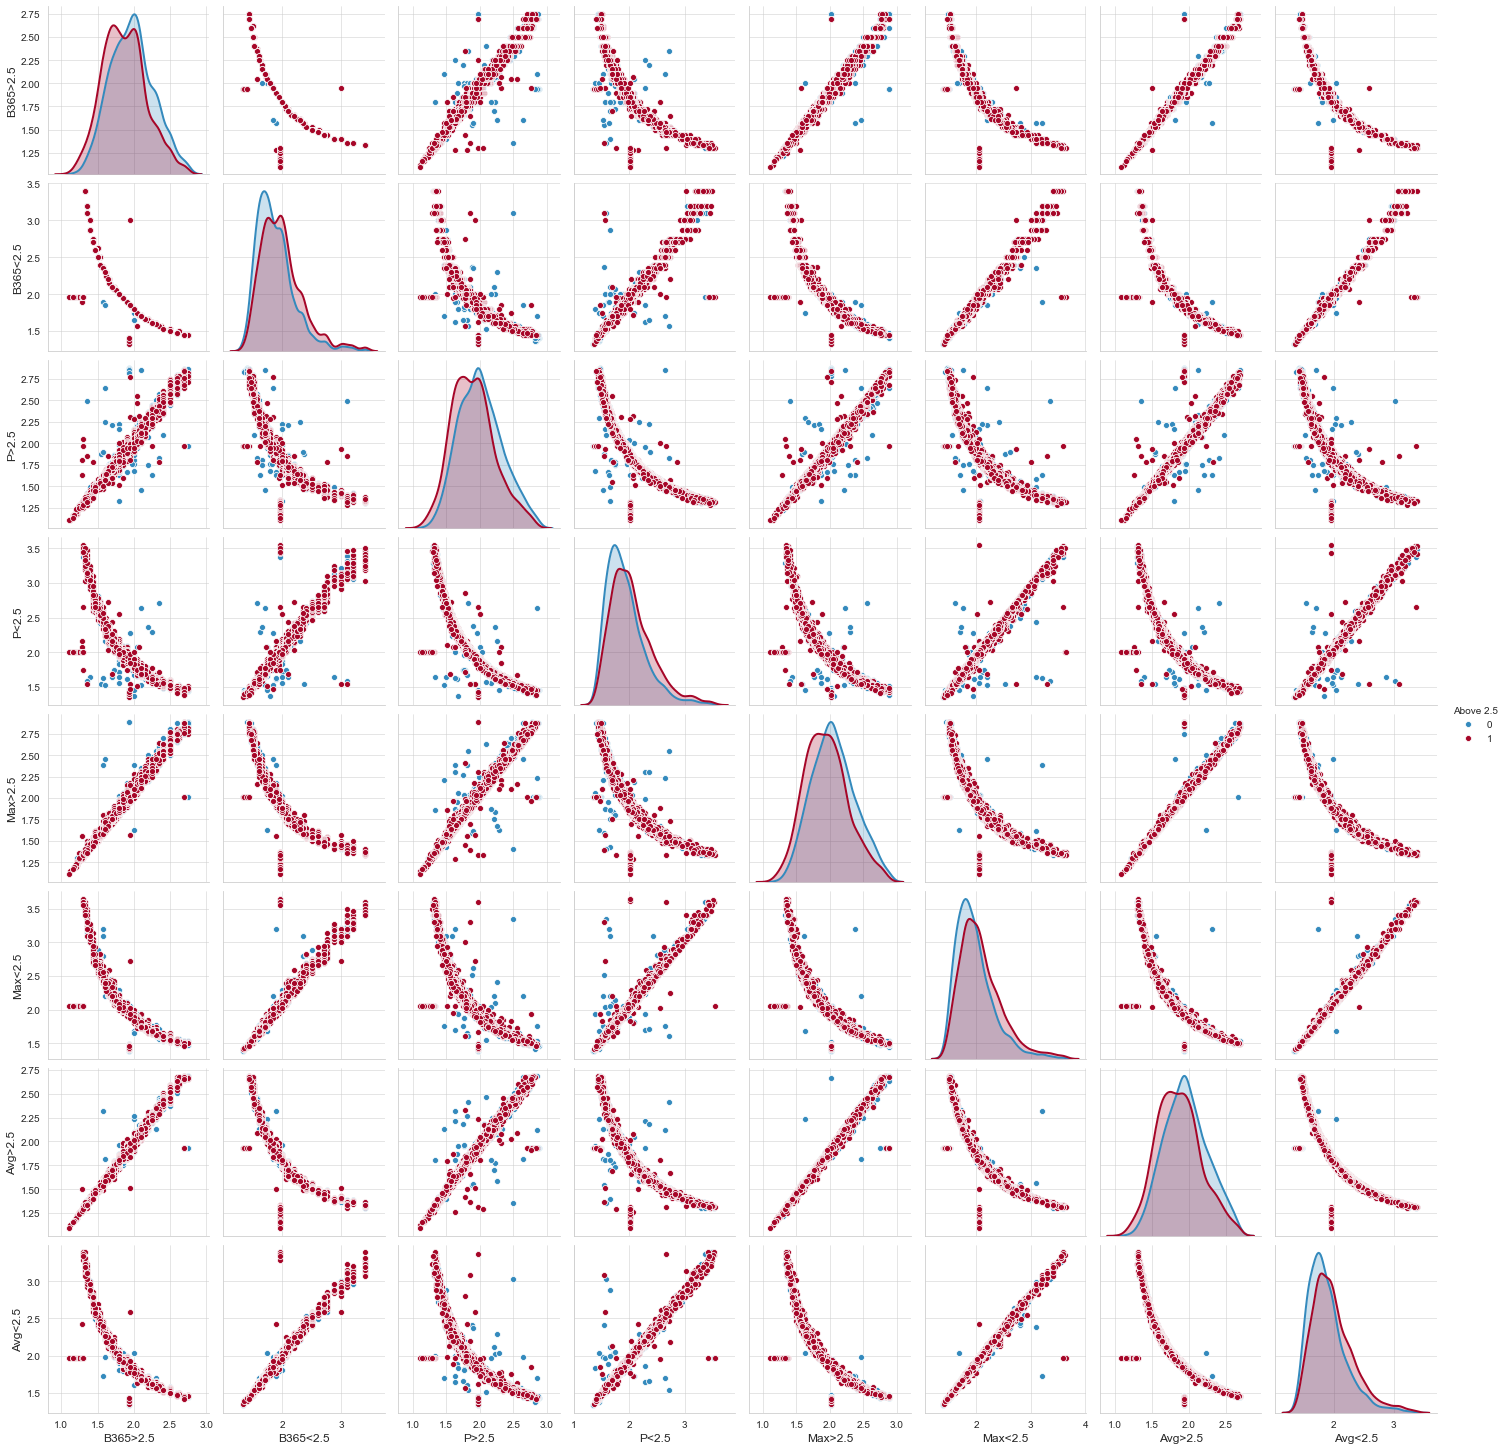

In [1687]:
#Multivariate analysis

sns.pairplot(data=df_2019_20[['B365>2.5','B365<2.5','P>2.5','P<2.5','Max>2.5','Max<2.5','Avg>2.5','Avg<2.5','Above 2.5']],
            hue='Above 2.5')

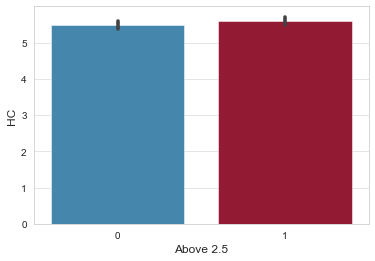

In [1688]:
sns.barplot(x='Above 2.5', y='HC', data=df_2019_20)
#sns.barplot(y='Above 2.5', x='HC', data=df_2019_20) 

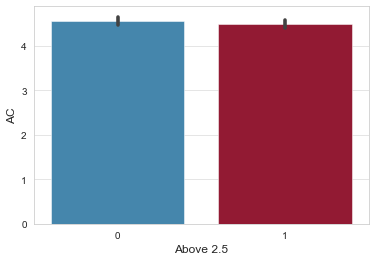

In [1689]:
sns.barplot(x='Above 2.5', y='AC', data=df_2019_20)

In [1690]:
df_2019_20['Date'] = pd.to_datetime(df_2019_20['Date'], dayfirst = True)

In [1691]:
df_2019_20.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,Total_Goals,FTR_A,FTR_D,FTR_H,HTR_A,HTR_D,HTR_H,Above 2.5,SH_AG,SH_HG
0,E1,2019-08-02,Luton,Middlesbrough,3,3,D,2,2,D,...,6,0,1,0,0,1,0,1,1,1
1,E1,2019-08-03,Barnsley,Fulham,1,0,H,1,0,H,...,1,0,0,1,0,0,1,0,0,0
2,E1,2019-08-03,Blackburn,Charlton,1,2,A,0,1,A,...,3,1,0,0,1,0,0,1,1,1
3,E1,2019-08-03,Brentford,Birmingham,0,1,A,0,1,A,...,1,1,0,0,1,0,0,0,0,0
4,E1,2019-08-03,Millwall,Preston,1,0,H,1,0,H,...,1,0,0,1,0,0,1,0,0,0


In [1692]:
df_2019_20_new = df_2019_20

In [1694]:
#sorting the home teams by Date 

df_sort = df_2019_20_new.groupby('HomeTeam').apply(lambda x: x.sort_values('Date'))

In [1696]:
df_sort.reset_index(inplace = True, drop = True)

In [1698]:
#find averages of Match statistics of last 5 matches for Home team

df_sort['HC_Avg_1']=df_sort.groupby('HomeTeam',sort=True).rolling(window=5).HC.mean().reset_index(drop='HomeTeam')
df_sort['HS_Avg_1']=df_sort.groupby('HomeTeam',sort=False).rolling(window=5).HS.mean().reset_index(drop='HomeTeam')
#df_sort['AS_Avg_1']=df_sort.groupby('HomeTeam',sort=False).rolling(window=5).AS.mean().reset_index(drop='HomeTeam')
df_sort['HST_Avg_1']=df_sort.groupby('HomeTeam',sort=False).rolling(window=5).HST.mean().reset_index(drop='HomeTeam')
#df_sort['AST_Avg_1']=df_sort.groupby('HomeTeam',sort=False).rolling(window=5).AST.mean().reset_index(drop='HomeTeam')
#df_sort['AC_Avg_1']=df_sort.groupby('HomeTeam',sort=False).rolling(window=5).AC.mean().reset_index(drop='HomeTeam')
df_sort['HF_Avg_1']=df_sort.groupby('HomeTeam',sort=False).rolling(window=5).HF.mean().reset_index(drop='HomeTeam')
#df_sort['AF_Avg_1']=df_sort.groupby('HomeTeam',sort=False).rolling(window=5).AF.mean().reset_index(drop='HomeTeam')
df_sort['HY_Avg_1']=df_sort.groupby('HomeTeam',sort=False).rolling(window=5).HY.mean().reset_index(drop='HomeTeam')
#df_sort['AY_Avg_1']=df_sort.groupby('HomeTeam',sort=False).rolling(window=5).AY.mean().reset_index(drop='HomeTeam')
df_sort['HR_Avg_1']=df_sort.groupby('HomeTeam',sort=False).rolling(window=5).HR.mean().reset_index(drop='HomeTeam')
#df_sort['AR_Avg_1']=df_sort.groupby('HomeTeam',sort=False).rolling(window=5).AR.mean().reset_index(drop='HomeTeam')


In [1699]:
missing_cols3 = ["HC_Avg_1","HS_Avg_1","HST_Avg_1","HF_Avg_1","HY_Avg_1","HR_Avg_1"]

In [1700]:
def random_imputation(df_sort, feature):

    number_missing = df_sort[feature].isnull().sum()
    observed_values = df_sort.loc[df_sort[feature].notnull(), feature]
    df_sort.loc[df_sort[feature].isnull(),feature] = np.random.choice(observed_values, number_missing, replace = True)
    
    return df_sort


In [1701]:
for feature in missing_cols3:
    #df_2019_20[feature + '_imp'] = df_2019_20[feature]
    df_sort = random_imputation(df_sort, feature)

In [1702]:
df_sort.head(10)

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HTR_H,Above 2.5,SH_AG,SH_HG,HC_Avg_1,HS_Avg_1,HST_Avg_1,HF_Avg_1,HY_Avg_1,HR_Avg_1
0,G1,2019-08-25,AEK,Xanthi,1,2,A,0,0,D,...,0,1,2,1,8.8,12.4,6.6,13.6,0.8,0.2
1,G1,2019-09-15,AEK,Lamia,2,0,H,2,0,H,...,1,0,0,0,5.0,14.6,5.2,14.4,3.2,0.2
2,G1,2019-09-29,AEK,PAOK,2,2,D,0,1,A,...,0,1,1,2,3.6,11.4,5.8,9.0,2.0,0.4
3,G1,2019-10-20,AEK,Volos NFC,3,2,H,1,1,D,...,0,1,1,2,7.8,7.8,3.2,12.6,0.6,0.2
4,G1,2019-11-03,AEK,Atromitos,3,2,H,0,1,A,...,0,1,1,3,6.6,12.4,6.0,13.8,2.2,0.2
5,G1,2019-11-24,AEK,Aris,1,1,D,0,0,D,...,0,0,1,1,7.2,13.0,6.6,13.6,2.2,0.0
6,G1,2019-12-07,AEK,Panionios,5,0,H,2,0,H,...,1,1,0,3,7.2,12.6,6.0,14.2,2.0,0.0
7,G1,2019-12-18,AEK,Asteras Tripolis,2,1,H,1,0,H,...,1,1,1,1,7.6,12.2,6.2,16.0,2.0,0.0
8,G1,2020-01-05,AEK,Panetolikos,3,1,H,1,1,D,...,0,1,0,2,7.2,12.6,6.6,18.2,2.4,0.0
9,G1,2020-01-19,AEK,Larisa,3,0,H,1,0,H,...,1,1,0,2,8.0,11.4,5.8,20.0,2.4,0.0


In [1703]:
df_sort = df_sort.groupby('AwayTeam').apply(lambda x: x.sort_values('Date'))

In [1704]:
df_sort.reset_index(inplace = True, drop = True)

In [1705]:
#find averages of Match statistics of last 5 matches for Away team

#df_sort['HC_Avg_2']=df_sort.groupby('AwayTeam',sort=False).rolling(window=5).HC.mean().reset_index(drop='AwayTeam')
#df_sort['HS_Avg_2']=df_sort.groupby('AwayTeam',sort=False).rolling(window=5).HS.mean().reset_index(drop='AwayTeam')
df_sort['AS_Avg_2']=df_sort.groupby('AwayTeam',sort=False).rolling(window=5).AS.mean().reset_index(drop='AwayTeam')
#df_sort['HST_Avg_2']=df_sort.groupby('AwayTeam',sort=False).rolling(window=5).HST.mean().reset_index(drop='AwayTeam')
df_sort['AST_Avg_2']=df_sort.groupby('AwayTeam',sort=False).rolling(window=5).AST.mean().reset_index(drop='AwayTeam')
df_sort['AC_Avg_2']=df_sort.groupby('AwayTeam',sort=False).rolling(window=5).AC.mean().reset_index(drop='AwayTeam')
#df_sort['HF_Avg_2']=df_sort.groupby('AwayTeam',sort=False).rolling(window=5).HF.mean().reset_index(drop='AwayTeam')
df_sort['AF_Avg_2']=df_sort.groupby('AwayTeam',sort=False).rolling(window=5).AF.mean().reset_index(drop='AwayTeam')
#df_sort['HY_Avg_2']=df_sort.groupby('AwayTeam',sort=False).rolling(window=5).HY.mean().reset_index(drop='AwayTeam')
df_sort['AY_Avg_2']=df_sort.groupby('AwayTeam',sort=False).rolling(window=5).AY.mean().reset_index(drop='AwayTeam')
#df_sort['HR_Avg_2']=df_sort.groupby('AwayTeam',sort=False).rolling(window=5).HR.mean().reset_index(drop='AwayTeam')
df_sort['AR_Avg_2']=df_sort.groupby('AwayTeam',sort=False).rolling(window=5).AR.mean().reset_index(drop='AwayTeam')


In [1706]:
missing_cols4 = ["AS_Avg_2","AST_Avg_2","AC_Avg_2","AF_Avg_2",
                 "AY_Avg_2","AR_Avg_2"]

In [1707]:
def random_imputation(df_sort, feature):

    number_missing = df_sort[feature].isnull().sum()
    observed_values = df_sort.loc[df_sort[feature].notnull(), feature]
    df_sort.loc[df_sort[feature].isnull(),feature] = np.random.choice(observed_values, number_missing, replace = True)
    
    return df_sort

In [1708]:
for feature in missing_cols4:
    #df_2019_20[feature + '_imp'] = df_2019_20[feature]
    df_sort = random_imputation(df_sort, feature)

In [1709]:
df_new = df_sort.drop(['HC', 'HS','AS','HST','AST','AC','HF','AF','HY','AY','HR','AR'], axis = 1) 

In [1710]:
df_new.shape

(5932, 115)

In [1711]:
df_new.to_csv('df_new.csv')

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


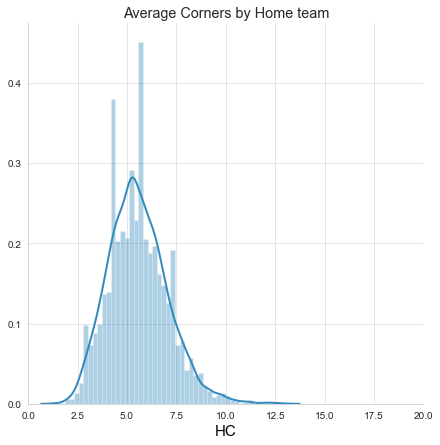

In [1712]:
sns.set_style("whitegrid")
a=sns.FacetGrid(df_new,size=6) \
   .map(sns.distplot,"HC_Avg_1") \
   .add_legend()
plt.xlim(0,20)
plt.xlabel("HC",size=15,color="Black")
plt.title("Average Corners by Home team")
plt.show()
sns.set_style("whitegrid")


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


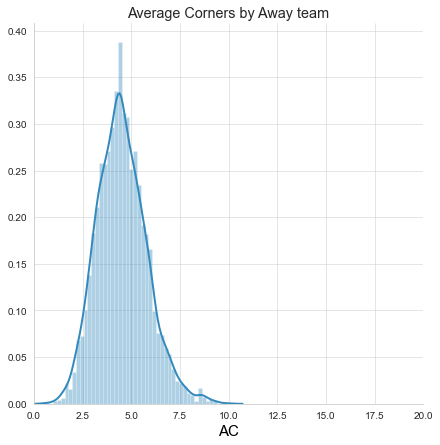

In [1713]:
sns.set_style("whitegrid")
sns.FacetGrid(df_new,size=6,) \
   .map(sns.distplot,"AC_Avg_2") \
   .add_legend()
plt.xlabel("AC",size=15,color="Black")
plt.title("Average Corners by Away team")
plt.xlim(0,20)
plt.show()


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


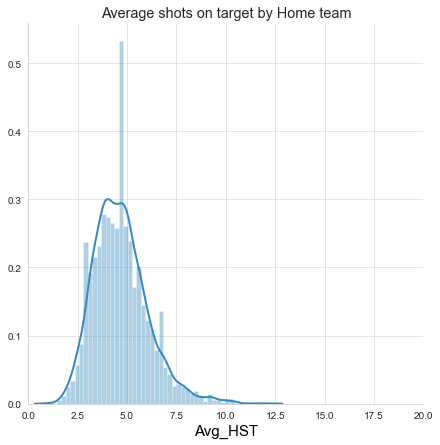

In [1714]:
sns.set_style("whitegrid")
a=sns.FacetGrid(df_new,size=6) \
   .map(sns.distplot,"HST_Avg_1") \
   .add_legend()
plt.xlim(0,20)
plt.xlabel("Avg_HST",size=15,color="Black")
plt.title("Average shots on target by Home team")
plt.show()

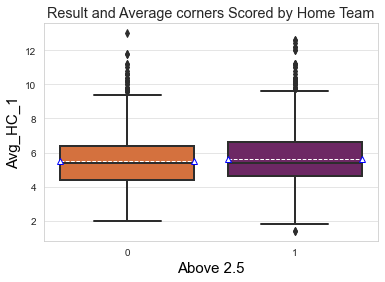

In [1715]:
sns.boxplot(data=df_new,x="Above 2.5",y="HC_Avg_1",palette="inferno_r", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and Average corners Scored by Home Team")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Avg_HC_1",size=15,color="Black")
plt.show()

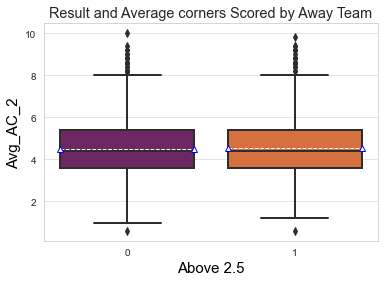

In [1716]:
sns.boxplot(data=df_new,x="Above 2.5",y="AC_Avg_2",palette="inferno", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and Average corners Scored by Away Team")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Avg_AC_2",size=15,color="Black")
plt.show()


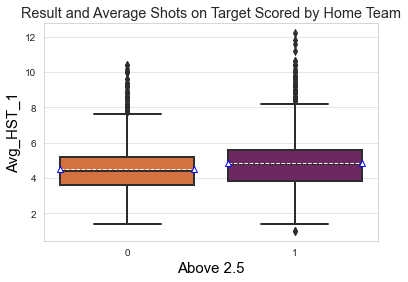

In [1717]:
sns.boxplot(data=df_new,x="Above 2.5",y="HST_Avg_1",palette="inferno_r", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and Average Shots on Target Scored by Home Team")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Avg_HST_1",size=15,color="Black")
plt.show()

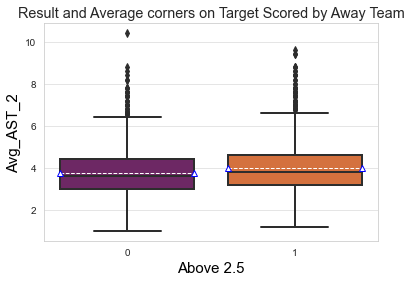

In [1718]:
sns.boxplot(data=df_new,x="Above 2.5",y="AST_Avg_2",palette="inferno", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and Average corners on Target Scored by Away Team")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Avg_AST_2",size=15,color="Black")
plt.show()


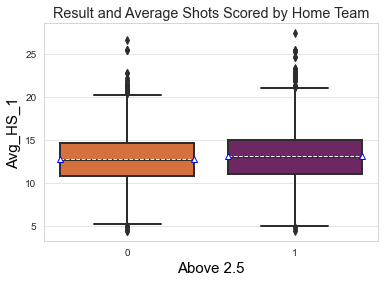

In [1719]:
sns.boxplot(data=df_new,x="Above 2.5",y="HS_Avg_1",palette="inferno_r", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and Average Shots Scored by Home Team")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Avg_HS_1",size=15,color="Black")
plt.show()

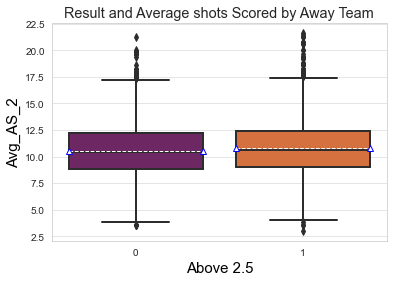

In [1720]:
sns.boxplot(data=df_new,x="Above 2.5",y="AS_Avg_2",palette="inferno", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and Average shots Scored by Away Team")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Avg_AS_2",size=15,color="Black")
plt.show()

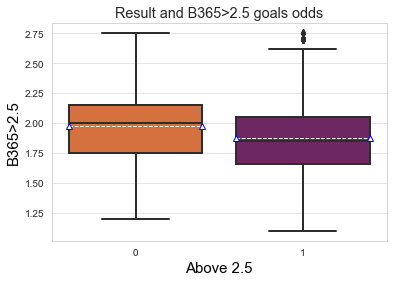

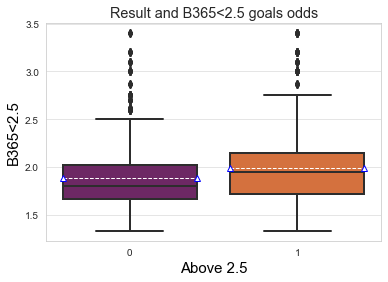

In [1721]:
sns.boxplot(data=df_new,x="Above 2.5",y="B365>2.5",palette="inferno_r", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and B365>2.5 goals odds")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("B365>2.5",size=15,color="Black")
plt.show()

sns.boxplot(data=df_new,x="Above 2.5",y="B365<2.5",palette="inferno", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and B365<2.5 goals odds")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("B365<2.5",size=15,color="Black")
plt.show()

In [1722]:
#Incidentally, average B365 odds for goals greater than 2.5 is higher when total goals are less than 2.5.
# Average B365 odds for goals lesser than 2.5 is higher when total goals are above 2.5.

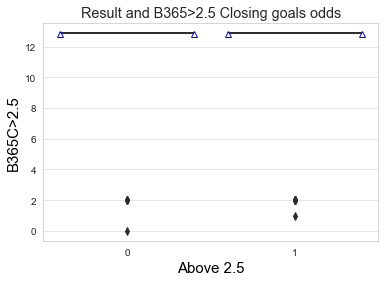

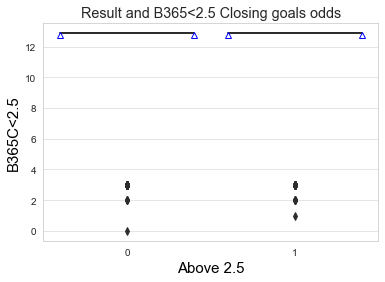

In [1723]:
sns.boxplot(data=df_new,x="Above 2.5",y="B365C>2.5",palette="inferno_r", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and B365>2.5 Closing goals odds")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("B365C>2.5",size=15,color="Black")
plt.show()

sns.boxplot(data=df_new,x="Above 2.5",y="B365C<2.5",palette="inferno", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and B365<2.5 Closing goals odds")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("B365C<2.5",size=15,color="Black")
plt.show()

In [1724]:
#Bet 365 closing odds for goals above/under 2.5 shows trends similar to normal Bet 365 odds.

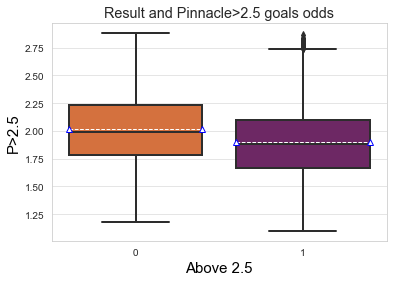

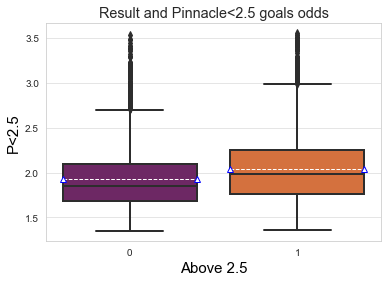

In [1725]:
sns.boxplot(data=df_new,x="Above 2.5",y="P>2.5",palette="inferno_r", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and Pinnacle>2.5 goals odds")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("P>2.5",size=15,color="Black")
plt.show()

sns.boxplot(data=df_new,x="Above 2.5",y="P<2.5",palette="inferno", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and Pinnacle<2.5 goals odds")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("P<2.5",size=15,color="Black")
plt.show()

In [1726]:
#Pinnacle also shows similar pattern like B365

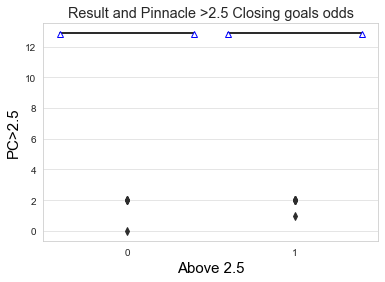

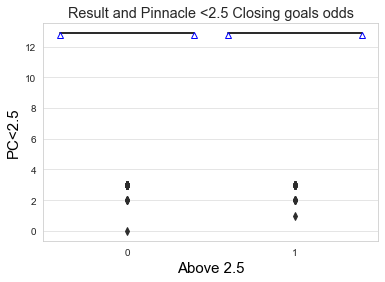

In [1727]:
sns.boxplot(data=df_new,x="Above 2.5",y="PC>2.5",palette="inferno_r", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and Pinnacle >2.5 Closing goals odds")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("PC>2.5",size=15,color="Black")
plt.show()

sns.boxplot(data=df_new,x="Above 2.5",y="PC<2.5",palette="inferno", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and Pinnacle <2.5 Closing goals odds")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("PC<2.5",size=15,color="Black")
plt.show()

In [1728]:
#Bet 365 closing odds for goals above/under 2.5 shows trends similar to normal Bet 365 odds.

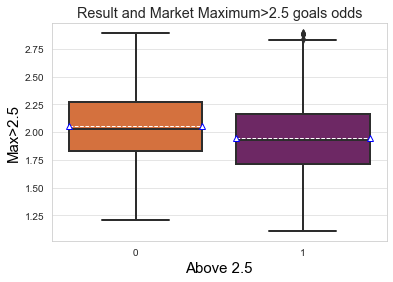

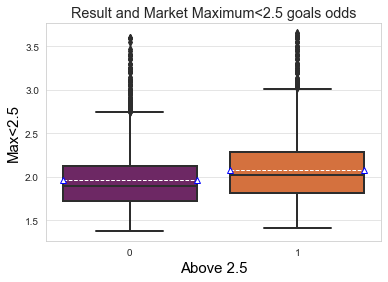

In [1729]:
sns.boxplot(data=df_new,x="Above 2.5",y="Max>2.5",palette="inferno_r", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and Market Maximum>2.5 goals odds")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Max>2.5",size=15,color="Black")
plt.show()

sns.boxplot(data=df_new,x="Above 2.5",y="Max<2.5",palette="inferno", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and Market Maximum<2.5 goals odds")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Max<2.5",size=15,color="Black")
plt.show()

In [1730]:
#Maximum odds for goals greater than 2.5 also shows similar pattern like B365

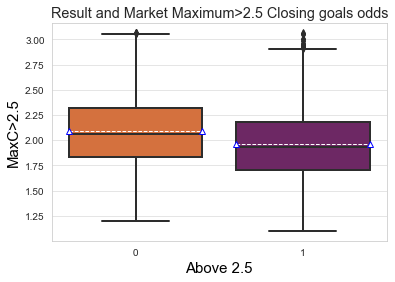

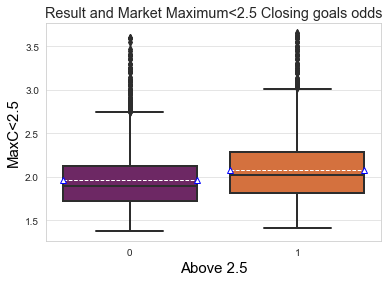

In [1731]:
sns.boxplot(data=df_new,x="Above 2.5",y="MaxC>2.5",palette="inferno_r", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and Market Maximum>2.5 Closing goals odds")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("MaxC>2.5",size=15,color="Black")
plt.show()

sns.boxplot(data=df_new,x="Above 2.5",y="Max<2.5",palette="inferno", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and Market Maximum<2.5 Closing goals odds")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("MaxC<2.5",size=15,color="Black")
plt.show()

In [1732]:
#The closing odds of Maximum odds above/under 2.5 goals shows similar trends to normal odds 
#It can be assumed that the closing and normal odds are correlated.

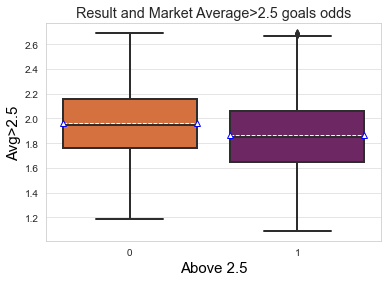

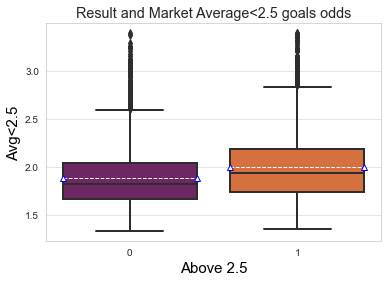

In [1733]:
sns.boxplot(data=df_new,x="Above 2.5",y="Avg>2.5",palette="inferno_r", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and Market Average>2.5 goals odds")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Avg>2.5",size=15,color="Black")
plt.show()

sns.boxplot(data=df_new,x="Above 2.5",y="Avg<2.5",palette="inferno", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and Market Average<2.5 goals odds")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Avg<2.5",size=15,color="Black")
plt.show()

In [1734]:
#Average odds for goals greater than 2.5 also shows similar pattern like B365

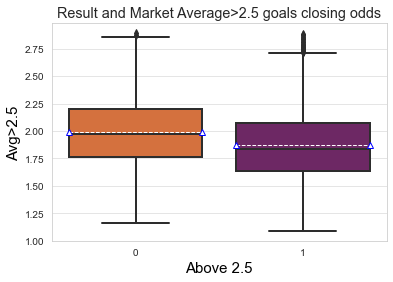

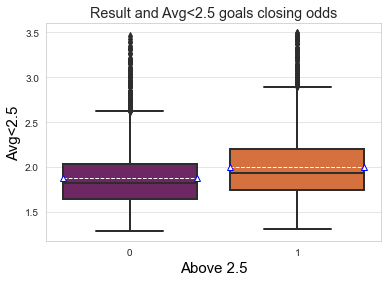

In [1735]:
sns.boxplot(data=df_new,x="Above 2.5",y="AvgC>2.5",palette="inferno_r", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and Market Average>2.5 goals closing odds")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Avg>2.5",size=15,color="Black")
plt.show()

sns.boxplot(data=df_new,x="Above 2.5",y="AvgC<2.5",palette="inferno", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and Avg<2.5 goals closing odds")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Avg<2.5",size=15,color="Black")
plt.show()

In [1736]:
#df_new.to_excel("df_new.xlsx")

In [1739]:
#df_new.to_excel("df_new.xlsx")

In [1740]:
df_new['Multip_B365_B365C'] = df_new['B365>2.5'] * df_new['B365C>2.5']
df_new['Multip2_B365_B365C'] = df_new['B365<2.5'] * df_new['B365C<2.5']

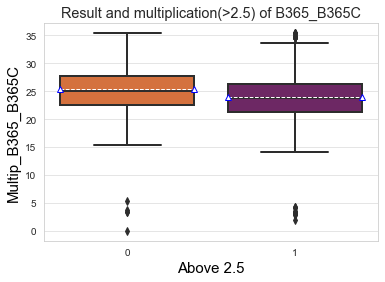

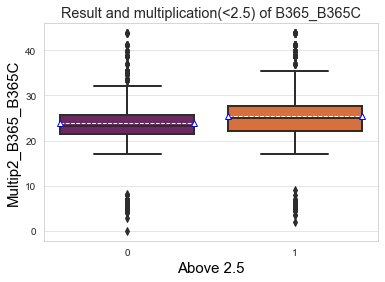

In [1741]:
sns.boxplot(data=df_new,x="Above 2.5",y="Multip_B365_B365C",palette="inferno_r", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and multiplication(>2.5) of B365_B365C")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Multip_B365_B365C",size=15,color="Black")
plt.show()

sns.boxplot(data=df_new,x="Above 2.5",y="Multip2_B365_B365C",palette="inferno", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and multiplication(<2.5) of B365_B365C")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Multip2_B365_B365C",size=15,color="Black")
plt.show()

In [1742]:
df_new['Diff_B365_B365C'] = df_new['B365>2.5'] - df_new['B365C>2.5']
df_new['Diff2_B365_B365C'] = df_new['B365<2.5'] - df_new['B365C<2.5']

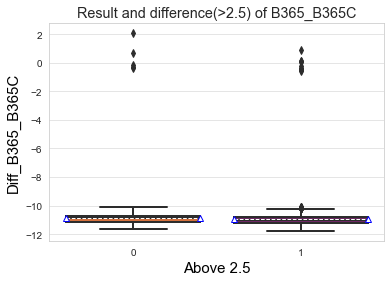

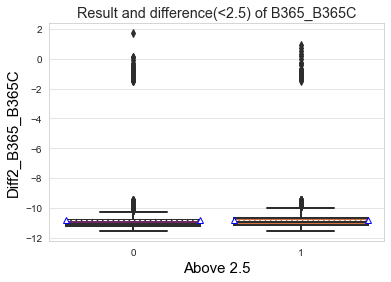

In [1743]:
sns.boxplot(data=df_new,x="Above 2.5",y="Diff_B365_B365C",palette="inferno_r", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and difference(>2.5) of B365_B365C")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Diff_B365_B365C",size=15,color="Black")
plt.show()

sns.boxplot(data=df_new,x="Above 2.5",y="Diff2_B365_B365C",palette="inferno", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and difference(<2.5) of B365_B365C")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Diff2_B365_B365C",size=15,color="Black")
plt.show()

In [1744]:
df_new['Diff_P_PC'] = df_new['P>2.5'] - df_new['PC>2.5']
df_new['Diff2_P_PC'] = df_new['P<2.5'] - df_new['PC<2.5']

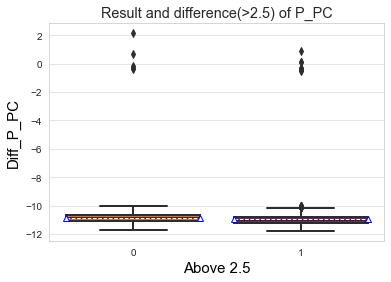

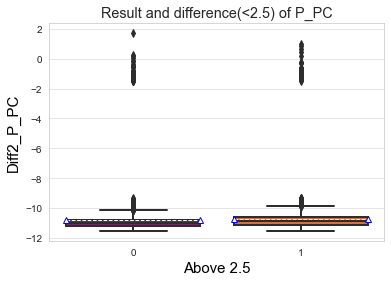

In [1745]:
sns.boxplot(data=df_new,x="Above 2.5",y="Diff_P_PC",palette="inferno_r", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and difference(>2.5) of P_PC")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Diff_P_PC",size=15,color="Black")
plt.show()

sns.boxplot(data=df_new,x="Above 2.5",y="Diff2_P_PC",palette="inferno", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and difference(<2.5) of P_PC")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Diff2_P_PC",size=15,color="Black")
plt.show()

In [1746]:
df_new['Diff_Max_MaxC'] = df_new['Max>2.5'] - df_new['MaxC>2.5']
df_new['Diff2_Max_MaxC'] = df_new['Max<2.5'] - df_new['MaxC<2.5']

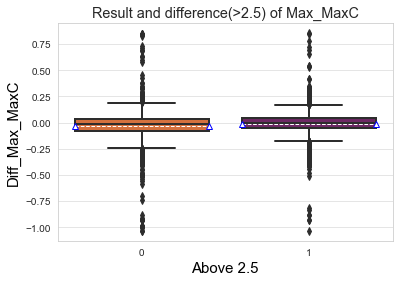

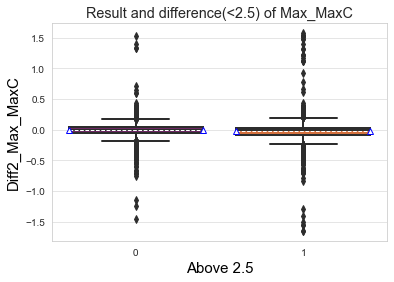

In [1747]:
sns.boxplot(data=df_new,x="Above 2.5",y="Diff_Max_MaxC",palette="inferno_r", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and difference(>2.5) of Max_MaxC")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Diff_Max_MaxC",size=15,color="Black")
plt.show()

sns.boxplot(data=df_new,x="Above 2.5",y="Diff2_Max_MaxC",palette="inferno", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and difference(<2.5) of Max_MaxC")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Diff2_Max_MaxC",size=15,color="Black")
plt.show()

In [1748]:
df_new['Multip_Max_MaxC'] = df_new['Max>2.5'] * df_new['MaxC>2.5']
df_new['Multip2_Max_MaxC'] = df_new['Max<2.5'] * df_new['MaxC<2.5']

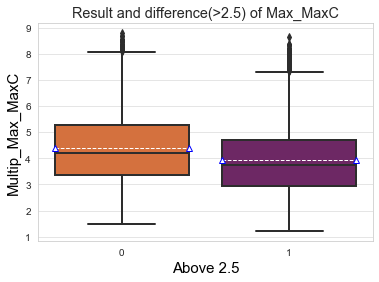

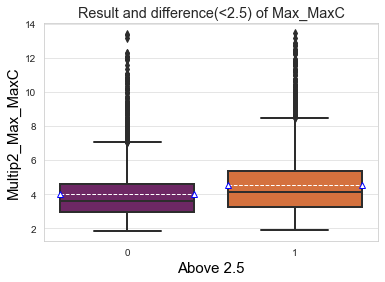

In [1749]:
sns.boxplot(data=df_new,x="Above 2.5",y="Multip_Max_MaxC",palette="inferno_r", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and difference(>2.5) of Max_MaxC")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Multip_Max_MaxC",size=15,color="Black")
plt.show()

sns.boxplot(data=df_new,x="Above 2.5",y="Multip2_Max_MaxC",palette="inferno", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and difference(<2.5) of Max_MaxC")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Multip2_Max_MaxC",size=15,color="Black")
plt.show()

In [1750]:
df_new['Multip_Avg_AvgC'] = df_new['Avg>2.5'] * df_new['AvgC>2.5']
df_new['Multip2_Avg_AvgC'] = df_new['Avg<2.5'] * df_new['AvgC<2.5']

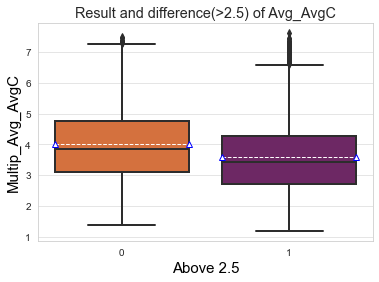

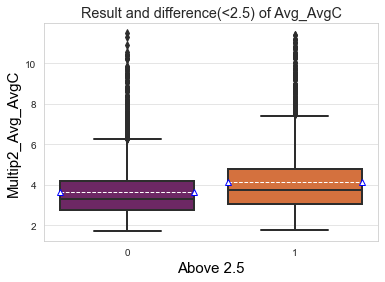

In [1751]:
sns.boxplot(data=df_new,x="Above 2.5",y="Multip_Avg_AvgC",palette="inferno_r", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and difference(>2.5) of Avg_AvgC")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Multip_Avg_AvgC",size=15,color="Black")
plt.show()

sns.boxplot(data=df_new,x="Above 2.5",y="Multip2_Avg_AvgC",palette="inferno", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and difference(<2.5) of Avg_AvgC")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Multip2_Avg_AvgC",size=15,color="Black")
plt.show()

In [1752]:
df_new['Diff_Avg_AvgC'] = df_new['Avg>2.5'] - df_new['AvgC>2.5']
df_new['Diff2_Avg_AvgC'] = df_new['Avg<2.5'] - df_new['AvgC<2.5']

In [1753]:
df_new['Multip_B365H_VCH'] = df_new['B365H'] * df_new['VCH']
df_new['Multip_B365A_VCA'] = df_new['B365A'] * df_new['VCA']

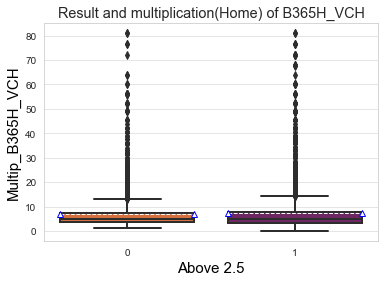

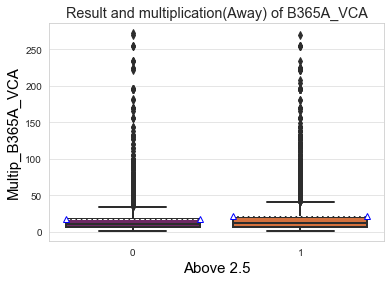

In [1754]:
sns.boxplot(data=df_new,x="Above 2.5",y="Multip_B365H_VCH",palette="inferno_r", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and multiplication(Home) of B365H_VCH")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Multip_B365H_VCH",size=15,color="Black")
plt.show()

sns.boxplot(data=df_new,x="Above 2.5",y="Multip_B365A_VCA",palette="inferno", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and multiplication(Away) of B365A_VCA")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Multip_B365A_VCA",size=15,color="Black")
plt.show()

In [1755]:
df_new['Diff_B365H_VCH'] = df_new['B365H'] - df_new['VCH']
df_new['Diff_B365A_VCA'] = df_new['B365A'] - df_new['VCA']

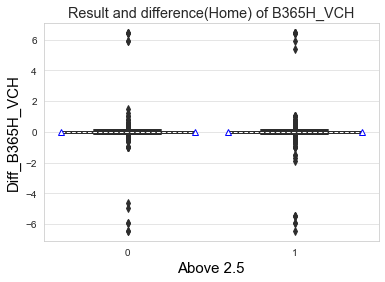

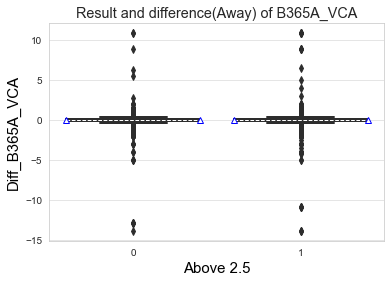

In [1756]:
sns.boxplot(data=df_new,x="Above 2.5",y="Diff_B365H_VCH",palette="inferno_r", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and difference(Home) of B365H_VCH")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Diff_B365H_VCH",size=15,color="Black")
plt.show()

sns.boxplot(data=df_new,x="Above 2.5",y="Diff_B365A_VCA",palette="inferno", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and difference(Away) of B365A_VCA")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Diff_B365A_VCA",size=15,color="Black")
plt.show()

In [1757]:
#Both the differences and multiplication of B365 and VC betting odds do not yield any useful information for Target.

In [1758]:
df_new['Div_B365H_VCH'] = df_new['B365H'] / df_new['VCH']
df_new['Div_B365A_VCA'] = df_new['B365A'] / df_new['VCA']

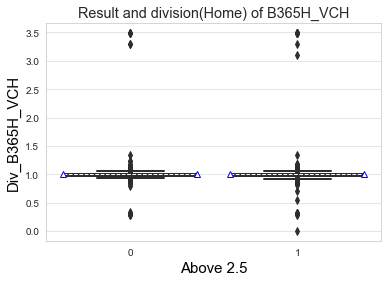

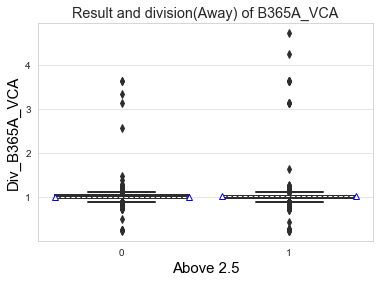

In [1759]:
sns.boxplot(data=df_new,x="Above 2.5",y="Div_B365H_VCH",palette="inferno_r", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and division(Home) of B365H_VCH")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Div_B365H_VCH",size=15,color="Black")
plt.show()

sns.boxplot(data=df_new,x="Above 2.5",y="Div_B365A_VCA",palette="inferno", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and division(Away) of B365A_VCA")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Div_B365A_VCA",size=15,color="Black")
plt.show()

In [1760]:
df_new['Multip_B365H_BWH'] = df_new['B365H'] * df_new['BWH']
df_new['Multip_B365A_BWA'] = df_new['B365A'] * df_new['BWA']

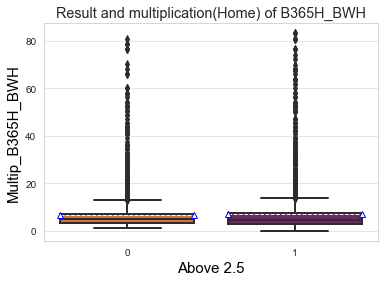

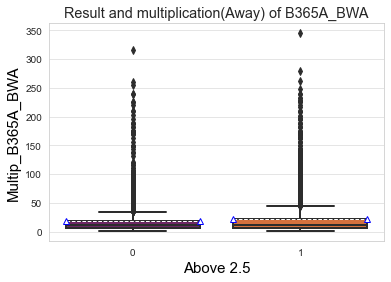

In [1761]:
sns.boxplot(data=df_new,x="Above 2.5",y="Multip_B365H_BWH",palette="inferno_r", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and multiplication(Home) of B365H_BWH")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Multip_B365H_BWH",size=15,color="Black")
plt.show()

sns.boxplot(data=df_new,x="Above 2.5",y="Multip_B365A_BWA",palette="inferno", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and multiplication(Away) of B365A_BWA")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Multip_B365A_BWA",size=15,color="Black")
plt.show()

In [1762]:
df_new['Multip_B365H_B365>2.5'] = df_new['B365H'] * df_new['B365>2.5']
df_new['Multip_B365H_B365<2.5'] = df_new['B365H'] * df_new['B365<2.5']

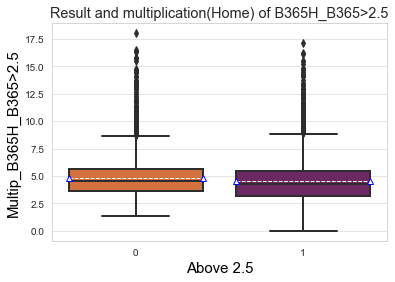

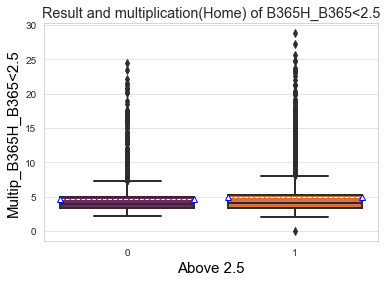

In [1763]:
sns.boxplot(data=df_new,x="Above 2.5",y="Multip_B365H_B365>2.5",palette="inferno_r", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and multiplication(Home) of B365H_B365>2.5")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Multip_B365H_B365>2.5",size=15,color="Black")
plt.show()

sns.boxplot(data=df_new,x="Above 2.5",y="Multip_B365H_B365<2.5",palette="inferno", \
            meanline=True,showmeans=True,\
            meanprops={"marker":"^","markerfacecolor":"white", "markeredgecolor":"blue","color":"White"})
plt.title("Result and multiplication(Home) of B365H_B365<2.5")
plt.xlabel("Above 2.5",size=15,color="Black")
plt.ylabel("Multip_B365H_B365<2.5",size=15,color="Black")
plt.show()

In [1764]:
cols = df_new.select_dtypes(exclude=['int']).columns

df_new[cols] = df_new[cols].apply(pd.to_numeric, errors='coerce')

In [1765]:
df_new.drop(['HomeTeam','AwayTeam','FTR','HTR','Country','Div'], axis = 1,inplace=True) 

In [1766]:
#find the correlation matrix 

df_corr = df_new.corr(method='pearson')

In [1767]:
df_corr.to_excel('df_Corr.xlsx')

In [1770]:
#creating new features out of betting odds variables

df_new['Diff_BWD_BWCD'] = df_new['BWD'] - df_new['BWCD']
df_new['Diff_IWD_IWCD'] = df_new['IWD'] - df_new['IWCD']
df_new['Multip_IWD_IWCD'] = df_new['IWD'] * df_new['IWCD']
df_new['Multip_PSD_PSCD'] = df_new['PSD'] * df_new['PSCD']
df_new['Diff_PSD_PSCD'] = df_new['PSCD'] -  df_new['PSD'] 
df_new['Diff_WHD_WHCD'] = df_new['WHCD'] -  df_new['WHD']
df_new['Diff_MaxD_MaxCD'] = df_new['MaxCD'] -  df_new['MaxD']


In [1771]:
df_new['Diff_PSH_PSCH'] = df_new['PSH'] -  df_new['PSCH']
df_new['Diff_PSA_PSCA'] = df_new['PSA'] -  df_new['PSCA']
df_new['Diff_BWH_BWCH'] = df_new['BWH'] -  df_new['BWCH']
df_new['Diff_PCAHA_PAHA'] = df_new['PCAHA'] -  df_new['PAHA']
df_new['Diff_AvgH_AvgCH'] = df_new['AvgH'] -  df_new['AvgCH']
df_new['Diff_IWH_IWCH'] = df_new['IWH'] - df_new['IWCH']
df_new['Diff_AvgAHA_AvgCAHA'] = df_new['AvgAHA'] -  df_new['AvgCAHA']
df_new['Diff_B365D_B365CD'] = df_new['B365D'] -  df_new['B365CD']
df_new['Diff_MaxH_MaxCH'] = df_new['MaxCH'] -  df_new['MaxH']
df_new['Diff_AvgAHH_AvgCAHH'] = df_new['AvgAHH'] -  df_new['AvgCAHH']
df_new['Diff_B365CAHA_B365AHA'] = df_new['B365CAHA'] -  df_new['B365AHA']
df_new['Diff_AvgD_AvgCD'] = df_new['AvgD'] -  df_new['AvgCD']
df_new['Diff_B365CA_B365A'] = df_new['B365CA'] -  df_new['B365A']
df_new['Diff_PCAHH_PAHH'] = df_new['PCAHH'] -  df_new['PAHH']
df_new['Diff_AvgA_AvgCA'] = df_new['AvgA'] -  df_new['AvgCA']
df_new['Diff_AHCh_AHh'] = df_new['AHCh'] -  df_new['AHh']
df_new['Diff_Max_MaxC'] = df_new['MaxC>2.5'] -  df_new['Max>2.5']
df_new['Diff2_Max_MaxC'] = df_new['MaxC<2.5'] -  df_new['Max<2.5']
df_new['Diff_VCD_VCCD'] = df_new['VCD'] -  df_new['VCCD']
df_new['Diff_WHA_WHCA'] = df_new['WHCA'] -  df_new['WHA']
df_new['Diff_WHH_WHCH'] = df_new['WHCH'] -  df_new['WHH']
df_new['Diff_MaxAHA_MaxCAHA'] = df_new['MaxAHA'] -  df_new['MaxCAHA']
df_new['Diff_VCA_VCCA'] = df_new['VCA'] -  df_new['VCCA']
df_new['Diff_VCH_VCCH'] = df_new['VCH'] -  df_new['VCCH']
df_new['Diff_IWA_IWCA'] = df_new['IWA'] - df_new['IWCA']
df_new['Diff_BWA_BWCA'] = df_new['BWA'] -  df_new['BWCA']
df_new['Diff_B365CH_B365H'] = df_new['B365CH'] -  df_new['B365H']
df_new['Diff_MaxAHH_MaxCAHH'] = df_new['MaxAHH'] -  df_new['MaxCAHH']
df_new['Diff_MaxA_MaxCA'] = df_new['MaxCA'] -  df_new['MaxA']



In [1774]:
correlated_features = set()
correlation_matrix = df_new.corr()

In [1775]:
#find all the correlated variables and save it to a dataframe using a for loop

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [1776]:
correlated_features2 = pd.DataFrame(correlated_features)

In [1777]:
correlated_features2.shape

(87, 1)

In [1778]:
df_new.shape
#df_new.to_excel('df_new.xlsx')

(5932, 167)

In [1836]:
df_new.to_csv('df_new.csv')

In [1781]:
#drop the highy correlated variables from the dataset

df_new.drop(labels=correlated_features, axis=1, inplace=True)
df_new.drop(['FTR_A','FTR_H','FTR_D','HTR_A','HTR_D','HTR_H'], axis = 1,inplace=True) 
df_new.drop(['FTAG','FTHG','HTHG','HTAG'], axis = 1,inplace=True) 
df_new.drop(['Total_Goals'], axis = 1,inplace=True)

In [1784]:
x = df_new.drop(['Above 2.5'], axis=1)
y = df_new['Above 2.5']

In [1785]:
df_new.dtypes


Date                   int64
B365H                float64
B365D                float64
B365A                float64
BWD                  float64
                      ...   
Diff_VCH_VCCH        float64
Diff_IWA_IWCA        float64
Diff_BWA_BWCA        float64
Diff_B365CH_B365H    float64
Diff_MaxA_MaxCA      float64
Length: 69, dtype: object

In [1786]:
#split the whole dataset in to train and test dataset

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split( 
        x, y, test_size = 0.25, random_state = 2) 

In [1787]:
#applying standardization to the data points

from sklearn.preprocessing import StandardScaler 
sc_x = StandardScaler() 
xtrain = sc_x.fit_transform(xtrain)  
xtest = sc_x.transform(xtest) 
  
#print (xtrain[0:10, :]) 

In [1788]:
df_xtrain = pd.DataFrame(xtrain, columns = x.columns)
df_xtest = pd.DataFrame(xtest, columns = x.columns)
df_xtrain.describe()
#X_imputed_df = pd.DataFrame(X_imputed, columns = X_train.columns)

,Date,B365H,B365D,B365A,BWD,BWA,B365>2.5,B365<2.5,AHh,B365AHH,...,Diff_AHCh_AHh,Diff_VCD_VCCD,Diff_WHA_WHCA,Diff_WHH_WHCH,Diff_VCA_VCCA,Diff_VCH_VCCH,Diff_IWA_IWCA,Diff_BWA_BWCA,Diff_B365CH_B365H,Diff_MaxA_MaxCA
count,4.449000e+03,4.449000e+03,4.449000e+03,4.449000e+03,4.449000e+03,4.449000e+03,4.449000e+03,4.449000e+03,4.449000e+03,4.449000e+03,...,4.449000e+03,4.449000e+03,4.449000e+03,4.449000e+03,4.449000e+03,4.449000e+03,4.449000e+03,4.449000e+03,4.449000e+03,4.449000e+03
mean,-3.720920e-14,-1.066553e-16,1.307613e-17,1.261197e-16,1.637261e-16,-2.736504e-16,7.643295e-16,3.886654e-17,-2.637684e-17,5.028819e-16,...,-1.887137e-16,-3.618986e-16,1.129812e-17,2.449840e-16,1.293014e-16,1.035360e-16,1.233841e-16,1.227010e-16,-5.675887e-17,3.337656e-18
std,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,...,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00,1.000112e+00
min,-1.800208e+00,-1.300742e+00,-1.395959e+00,-1.298203e+00,-1.137898e+00,-1.028667e+00,-2.752229e+00,-1.760993e+00,-5.607437e+00,-2.923972e+00,...,-8.945334e+00,-1.383461e+01,-1.104188e+01,-1.166608e+01,-1.303386e+01,-1.415459e+01,-1.314759e+01,-2.129592e+00,-1.358708e+01,-1.315748e+01
25%,-8.603078e-01,-5.701494e-01,-5.102920e-01,-5.840516e-01,-4.432962e-01,-5.031680e-01,-6.922113e-01,-6.731235e-01,-2.965040e-01,-7.856379e-01,...,-4.159092e-03,-2.360620e-01,-1.721782e-01,-1.462591e-01,-1.677076e-01,-1.533736e-01,-1.444986e-01,-6.784353e-01,-2.482174e-01,-1.702591e-01
50%,5.022071e-02,-2.322500e-01,-2.498017e-01,-2.615317e-01,-2.944530e-01,-2.368677e-01,-9.414170e-02,-8.508602e-02,1.120293e-01,1.066075e-01,...,-4.159092e-03,5.815049e-02,-7.053840e-02,-5.566001e-02,2.065976e-02,7.682128e-02,3.121886e-02,-1.300482e-01,-3.715866e-02,-7.274309e-02
75%,8.873195e-01,2.243706e-01,1.003809e-01,2.130334e-01,5.284767e-02,1.288512e-01,5.703801e-01,5.029514e-01,5.205626e-01,7.899765e-01,...,-4.159092e-03,3.523630e-01,8.192129e-02,1.255382e-01,2.090271e-01,2.302846e-01,2.069363e-01,5.942366e-01,1.739001e-01,9.978525e-02
max,2.752434e+00,5.977791e+00,5.611231e+00,5.589902e+00,1.369680e+01,1.314916e+01,2.730076e+00,4.325195e+00,2.563229e+00,1.802872e+00,...,7.887496e+00,1.239775e+01,1.502378e+01,1.438584e+01,1.305280e+01,1.233937e+01,1.420114e+01,9.228013e+00,1.462742e+01,1.528228e+01


In [1789]:
x.describe()

,Date,B365H,B365D,B365A,BWD,BWA,B365>2.5,B365<2.5,AHh,B365AHH,...,Diff_AHCh_AHh,Diff_VCD_VCCD,Diff_WHA_WHCA,Diff_WHH_WHCH,Diff_VCA_VCCA,Diff_VCH_VCCH,Diff_IWA_IWCA,Diff_BWA_BWCA,Diff_B365CH_B365H,Diff_MaxA_MaxCA
count,5.932000e+03,5932.000000,5932.000000,5932.000000,5932.000000,5932.000000,5932.000000,5932.000000,5932.000000,5932.000000,...,5932.000000,5932.000000,5932.000000,5932.000000,5932.000000,5932.000000,5932.000000,5932.000000,5932.000000,5932.000000
mean,1.574689e+18,2.444362,3.701191,3.882694,3.709112,4.004683,1.923090,1.935945,-0.326524,1.931312,...,0.000677,-0.022070,0.067591,0.028302,-0.020745,-0.036709,-0.020212,-7.496334,0.015543,0.107018
std,5.855034e+15,1.098191,0.770154,2.170770,1.014756,2.872875,0.302079,0.341566,0.617907,0.088062,...,0.196622,0.355454,1.013486,0.555796,1.146576,0.537591,0.939812,3.881820,0.489741,1.375301
min,1.564099e+18,0.000000,2.620000,1.050000,2.550000,1.070000,1.100000,1.330000,-3.750000,1.670000,...,-1.750000,-4.722016,-12.794340,-6.407581,-14.860702,-7.418798,-11.612489,-15.780000,-6.419975,-17.433446
25%,1.569629e+18,1.800000,3.300000,2.600000,3.250000,2.550000,1.700000,1.700000,-0.500000,1.860000,...,0.000000,-0.100000,-0.100000,-0.060000,-0.200000,-0.110000,-0.150000,-10.100000,-0.100000,-0.130000
50%,1.574813e+18,2.200000,3.500000,3.300000,3.400000,3.300000,1.900000,1.900000,-0.250000,1.939280,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.000000,0.000000,0.010000
75%,1.579910e+18,2.700000,3.800000,4.330000,3.750000,4.400000,2.100000,2.100000,0.000000,2.000000,...,0.000000,0.100000,0.170000,0.100000,0.200000,0.080000,0.150000,-5.250000,0.100000,0.240000
max,1.590883e+18,9.000000,8.000000,16.000000,17.500000,41.000000,2.750000,3.400000,1.250000,2.090000,...,1.544584,4.194111,14.850791,7.970000,13.836938,6.392436,12.096056,28.127167,6.948105,20.480000


In [1790]:
df_xtrain.to_csv('x_train.csv')
df_xtest.to_csv('x_test.csv')

In [1791]:
#fit the train dataset with logistic regression

from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import GridSearchCV
classifier_log = LogisticRegression(random_state = 2) 
classifier_log.fit(xtrain, ytrain) 

LogisticRegression(random_state=2)

In [1792]:
#predict the target values based on the test dataset

y_pred = classifier_log.predict(xtest) 

In [1793]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(ytest, y_pred) 
  
print ("Confusion Matrix : \n", cm) 

Confusion Matrix : 
 [[598 134]
 [177 574]]


In [1794]:
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(ytest, y_pred)) 

Accuracy :  0.7902899527983817


In [1795]:
#specify different values for the parameters for hyperparameter tuning

log_param = {'C':[0.01,0.2,0.5,1,10,100,1000],'penalty':['l1','l2',]}

In [1796]:
log_1 = GridSearchCV(classifier_log,log_param)

In [1797]:
log_2 = log_1.fit(xtrain,ytrain)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_valida

In [1798]:
#best parameters obtained using GridSearchCV for logstic regression

log_2.best_params_

{'C': 0.01, 'penalty': 'l2'}

In [1799]:
#best accuracy score obtained using GridSearchCV for logstic regression

log_2.best_score_

0.7806236018250527

In [1800]:
#fitting the train dataset using the best parameters

classifier_log = LogisticRegression(C=0.01, penalty = 'l2',random_state = 2) 
classifier_log.fit(xtrain, ytrain) 

LogisticRegression(C=0.01, random_state=2)

In [1801]:
y_pred = classifier_log.predict(xtest) 

In [1802]:
cm = confusion_matrix(ytest, y_pred) 
  
print ("Confusion Matrix : \n", cm) 

Confusion Matrix : 
 [[600 132]
 [177 574]]


In [1803]:
print ("Accuracy : ", accuracy_score(ytest, y_pred)) 

Accuracy :  0.7916385704652731


In [1804]:
log_pred_act = pd.DataFrame(data={'predictions': y_pred, 'actual': ytest})
log_pred_act.to_csv('log_pred_act.csv')

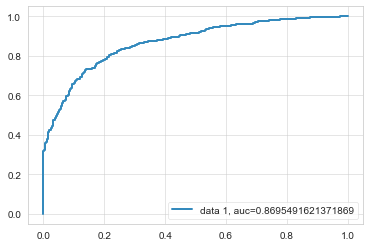

In [1805]:
#AUC - ROC of logistic regression

import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn import metrics

y_pred_proba = classifier_log.predict_proba(xtest)[::,1]
fpr, tpr, _ = metrics.roc_curve(ytest,  y_pred_proba)
auc = metrics.roc_auc_score(ytest, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [1806]:
df_corr2 = df_new.corr(method='pearson')
#df_corr2.to_excel('df_Corr2.xlsx')

In [1807]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [1808]:
cv = KFold(n_splits=10)            # Desired number of Cross Validation folds
accuracies = list()
max_attributes = len(list(df_new))
depth_range = range(1, max_attributes + 1)

# Testing max_depths from 1 to max attributes
# Uncomment prints for details about each Cross Validation pass
for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(max_depth = depth)
    # print("Current max depth: ", depth, "\n")
    #for train_fold, valid_fold in cv.split(df_new):
        f_train = df_new.loc[train_fold] # Extract train data with cv indices
        f_valid = df_new.loc[valid_fold] # Extract valid data with cv indices

        model = tree_model.fit(X = f_train.drop(['Above 2.5'], axis=1), 
                               y = f_train["Above 2.5"]) # We fit the model with the fold train data
        valid_acc = model.score(X = f_valid.drop(['Above 2.5'], axis=1), 
                                y = f_valid["Above 2.5"])# We calculate accuracy with the fold validation data
        fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    # print("Accuracy per fold: ", fold_accuracy, "\n")
    # print("Average accuracy: ", avg)

IndentationError: unexpected indent (<ipython-input-1808-b163e22f3e90>, line 9)

In [ ]:
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
#print(df.to_string(index=False))
#df.sort_values('Average Accuracy',ascending=False)

In [ ]:
#max_depth = 4 yields the highest accuracy which is 0.787429. 

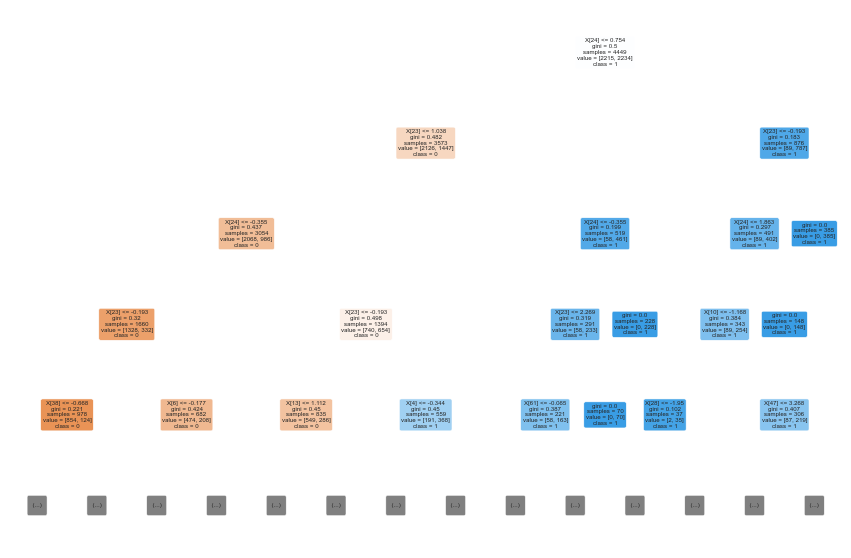

In [1809]:
#fitting and plotting the train dataset using Decision Tree algorithm

decision_tree = tree.DecisionTreeClassifier()
decision_tree.fit(xtrain, ytrain)

# Predicting results for test dataset
y_pred = decision_tree.predict(xtest)
submission = pd.DataFrame({
        "Original": ytest,
        "Predicted values": y_pred
    })
submission.to_csv('submission.csv', index=False)

fig = plt.figure(figsize=(15,10))
foo = tree.plot_tree(decision_tree,
               max_depth = 4,
               impurity = True,
               feature_names = None,
               class_names = ['0', '1'],                            
               rounded = True,
               filled= True )

plt.savefig('foo1.pdf')
plt.show()

In [1810]:
y_pred = decision_tree.predict(xtest)

In [1811]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(ytest, y_pred))
print(classification_report(ytest, y_pred))

[[500 232]
 [209 542]]
              precision    recall  f1-score   support

           0       0.71      0.68      0.69       732
           1       0.70      0.72      0.71       751

    accuracy                           0.70      1483
   macro avg       0.70      0.70      0.70      1483
weighted avg       0.70      0.70      0.70      1483



In [1812]:
depths = np.arange(1, 21)
num_leafs = [1, 5, 10, 20, 50, 100]

In [1813]:
dt_param = {'criterion':['gini','entropy'],'max_depth':depths,'min_samples_split': [2, 3, 4],'min_samples_leaf':num_leafs}

In [1814]:
decision_tree1 = tree.DecisionTreeClassifier()

In [1815]:
from sklearn.model_selection import GridSearchCV
dt_1 = GridSearchCV(decision_tree1, dt_param, cv=10)

In [1816]:
dt_2 =  dt_1.fit(xtrain,ytrain)

In [1817]:
dt_1.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 10,
 'min_samples_split': 2}

In [1818]:
dt_2.best_score_

0.7851164085433748

In [1819]:
decision_tree = tree.DecisionTreeClassifier(criterion = 'gini',max_depth = 4, min_samples_leaf = 10, min_samples_split = 2)
decision_tree.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=10)

In [1820]:
y_pred = decision_tree.predict(xtest)

In [1821]:
print(confusion_matrix(ytest, y_pred))
print(classification_report(ytest, y_pred))

[[624 108]
 [187 564]]
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       732
           1       0.84      0.75      0.79       751

    accuracy                           0.80      1483
   macro avg       0.80      0.80      0.80      1483
weighted avg       0.80      0.80      0.80      1483



In [1822]:
dt_pred_act = pd.DataFrame(data={'predictions': y_pred, 'actual': ytest})
dt_pred_act.to_csv('dt_pred_act.csv')

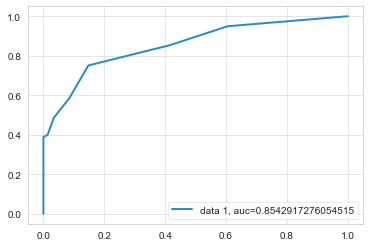

In [1823]:
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn import metrics

y_pred_proba = decision_tree.predict_proba(xtest)[::,1]
fpr, tpr, _ = metrics.roc_curve(ytest,  y_pred_proba)
auc = metrics.roc_auc_score(ytest, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

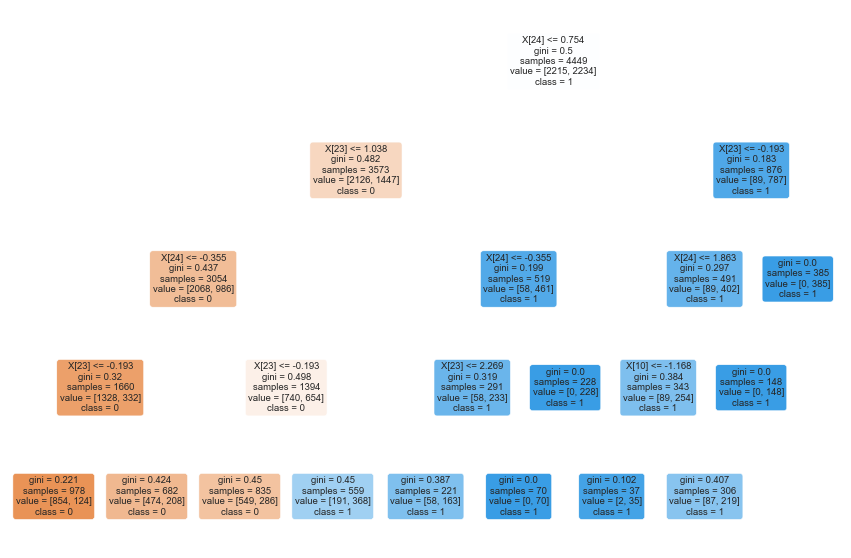

In [1824]:
fig = plt.figure(figsize=(15,10))
foo = tree.plot_tree(decision_tree,
               max_depth = 4,
               impurity = True,
               feature_names = None,
               class_names = ['0', '1'],                            
               rounded = True,
               filled= True )

In [1825]:
#fitting the train dataset using Support Vector Machine (SVM) 

from sklearn.svm import SVC
classifier = SVC(probability=True)
classifier.fit(xtrain,ytrain)

SVC(probability=True)

In [1826]:
y_pred = classifier.predict(xtest)

In [1827]:
cm = confusion_matrix(ytest,y_pred)
accuracy = float(cm.diagonal().sum())/len(ytest)
print("\nAccuracy Of SVM For The Given Dataset : ", accuracy)


Accuracy Of SVM For The Given Dataset :  0.7855697909642616


In [1828]:
svm_pred_act = pd.DataFrame(data={'predictions': y_pred, 'actual': ytest})
svm_pred_act.to_csv('svm_pred_act.csv')

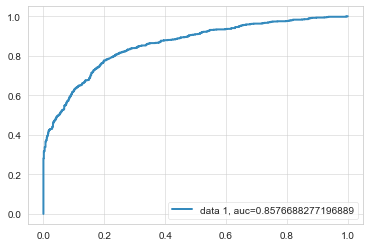

In [1829]:
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn import metrics

y_pred_proba = classifier.predict_proba(xtest)[::,1]
fpr, tpr, _ = metrics.roc_curve(ytest,  y_pred_proba)
auc = metrics.roc_auc_score(ytest, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
#svm_param = [{'C':[1,10,100,1000],'kernel':['linear']},
            #{'C':[1,10,100,1000],'kernel':['rbf'],'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}]

In [ ]:
#svm_1 = GridSearchCV(classifier, param_grid = svm_param, cv=10, scoring = 'accuracy', n_jobs=-1)

In [ ]:
#svm_2 = svm_1.fit(xtrain,ytrain)

In [1830]:
#Initiating Neural Network 

import sklearn.neural_network
nn_model = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', 
                                                 alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, 
                                                 max_iter=1000, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, 
                                                 nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, 
                                                 n_iter_no_change=10)

In [1831]:
nn_model.fit(xtrain,ytrain)

MLPClassifier(max_iter=1000)

In [1832]:
print('\n-- Training data --')
predictions = nn_model.predict(xtrain)
accuracy = sklearn.metrics.accuracy_score(ytrain, predictions)
print('Accuracy: {0:.2f}'.format(accuracy * 100.0))
print('Classification Report:')
print(sklearn.metrics.classification_report(ytrain, predictions))
print('Confusion Matrix:')
print(sklearn.metrics.confusion_matrix(ytrain, predictions))
print('')


-- Training data --
Accuracy: 100.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2215
           1       1.00      1.00      1.00      2234

    accuracy                           1.00      4449
   macro avg       1.00      1.00      1.00      4449
weighted avg       1.00      1.00      1.00      4449

Confusion Matrix:
[[2215    0]
 [   0 2234]]



In [1833]:
# Evaluate on test data
print('\n---- Test data ----')
predictions = nn_model.predict(xtest)
accuracy = sklearn.metrics.accuracy_score(ytest, predictions)
print('Accuracy: {0:.2f}'.format(accuracy * 100.0))
print('Classification Report:')
print(sklearn.metrics.classification_report(ytest, predictions))
print('Confusion Matrix:')
print(sklearn.metrics.confusion_matrix(ytest, predictions))



---- Test data ----
Accuracy: 74.58
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.76      0.75       732
           1       0.76      0.73      0.75       751

    accuracy                           0.75      1483
   macro avg       0.75      0.75      0.75      1483
weighted avg       0.75      0.75      0.75      1483

Confusion Matrix:
[[555 177]
 [200 551]]


In [1834]:
nn_pred_act = pd.DataFrame(data={'predictions': y_pred, 'actual': ytest})
nn_pred_act.to_csv('nn_pred_act.csv')

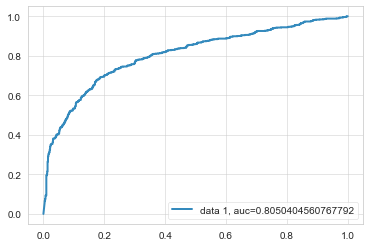

In [1835]:
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn import metrics

y_pred_proba = nn_model.predict_proba(xtest)[::,1]
fpr, tpr, _ = metrics.roc_curve(ytest,  y_pred_proba)
auc = metrics.roc_auc_score(ytest, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()